In [1]:
conda activate tf


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load Data Files
plos = pd.read_excel('training_dataset_AVG_PL_prediction.xlsx')
pathloss = plos[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
                 

## 1. Exploratory Data Analysis 

In [3]:
print(pathloss.corr())

                       no_visible_walls  avg_distance_to_walls  \
no_visible_walls               1.000000               0.539872   
avg_distance_to_walls          0.539872               1.000000   
min_distace_to_walls           0.534262               0.477693   
Phi                           -0.112536              -0.224997   
Theta                         -0.111994              -0.025804   
3d_distance                    0.020567               0.263690   
walls_pen                     -0.106639              -0.075232   
indoor_distance               -0.243428              -0.117886   
outdoor_distance               0.101508               0.316376   
min_wall_height               -0.178505              -0.150812   
max_wall_height               -0.154711              -0.139919   
avg_wall_height               -0.165786              -0.146730   
Transmitter_ZZ                -0.069796              -0.083155   
Path_loss_average             -0.101957               0.034808   

         

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


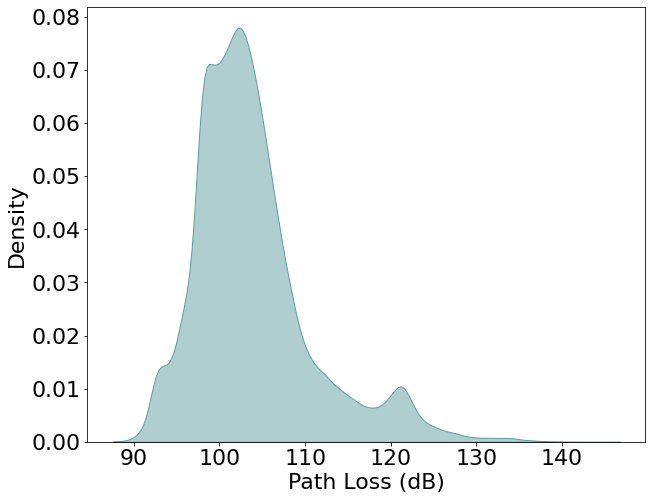

In [42]:
plt.figure(figsize=(10, 8))
sns.set_palette('colorblind')
sns.kdeplot(data=plos, x='Path_loss_average', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Path Loss (dB)", fontsize=22)
plt.ylabel("Density", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('path_loss_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


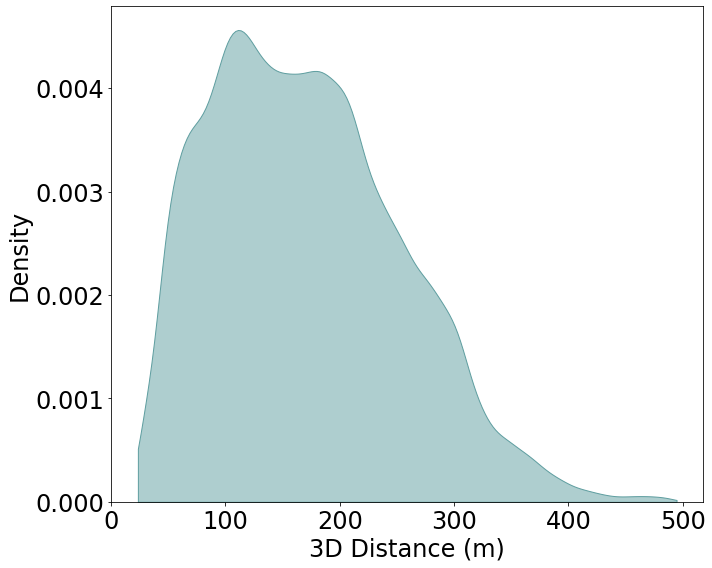

In [41]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='3d_distance', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("3D Distance (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('3d_distance_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


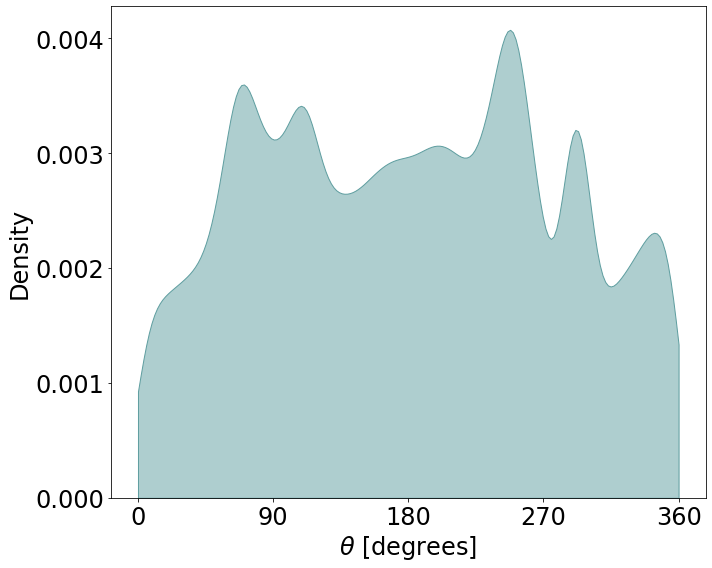

In [26]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='Theta', bw_adjust = 1, cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel(r"${\theta}$ [degrees]", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks([0,90,180,270,360],fontsize=24)
plt.yticks([0, 0.001, 0.002, 0.003, 0.004],fontsize=24)
plt.savefig('theta_angle_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


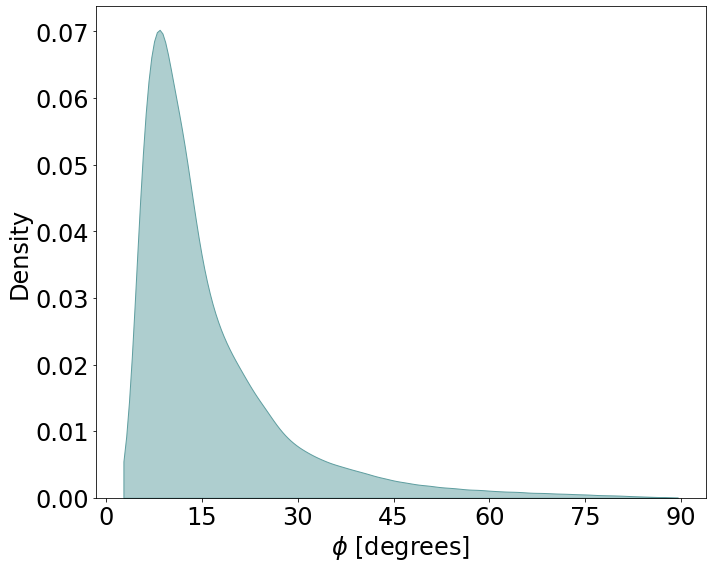

In [40]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='Phi', cut=0,color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel(r"${\phi}$ [degrees]", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks([0,15,30,45,60,75,90],fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('phi_angle_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


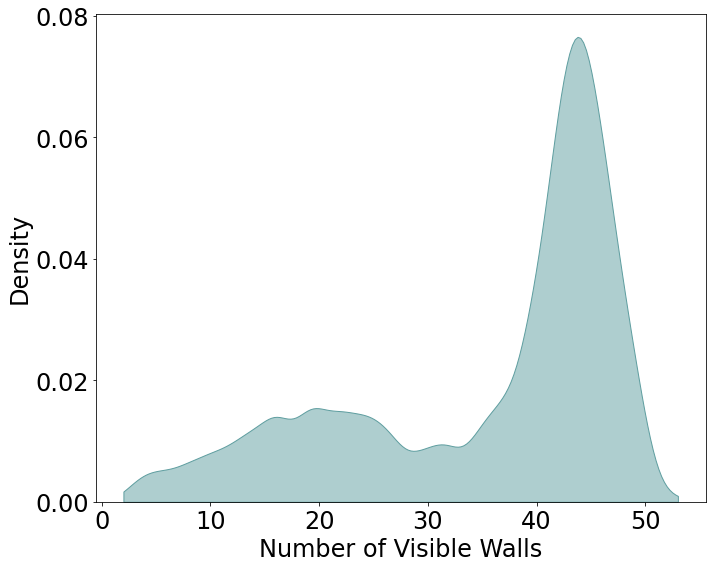

In [47]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='no_visible_walls', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Number of Visible Walls", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks([0, 0.02, 0.04, 0.06, 0.08],fontsize=24)
plt.savefig('no_vis_walls_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


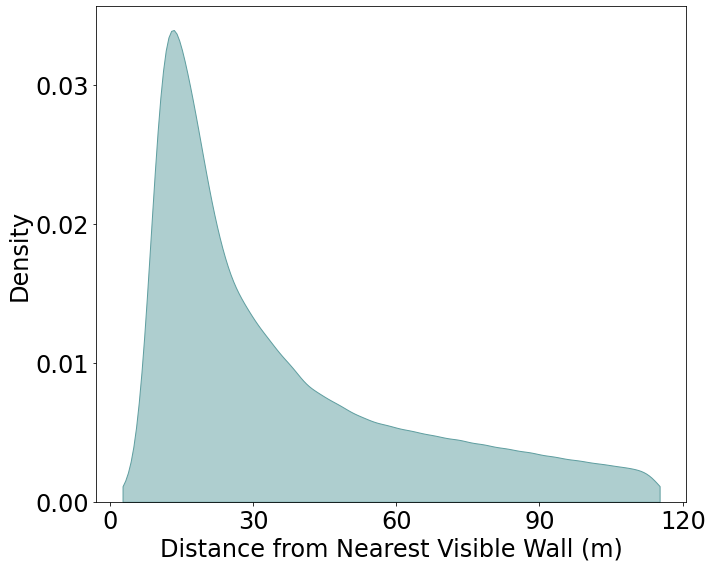

In [48]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='min_distace_to_walls', cut=0,color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Distance from Nearest Visible Wall (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks([0,30,60,90,120],fontsize=24)
plt.yticks([0, 0.010, 0.020,0.030],fontsize=24)
plt.savefig('min_dist_walls_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


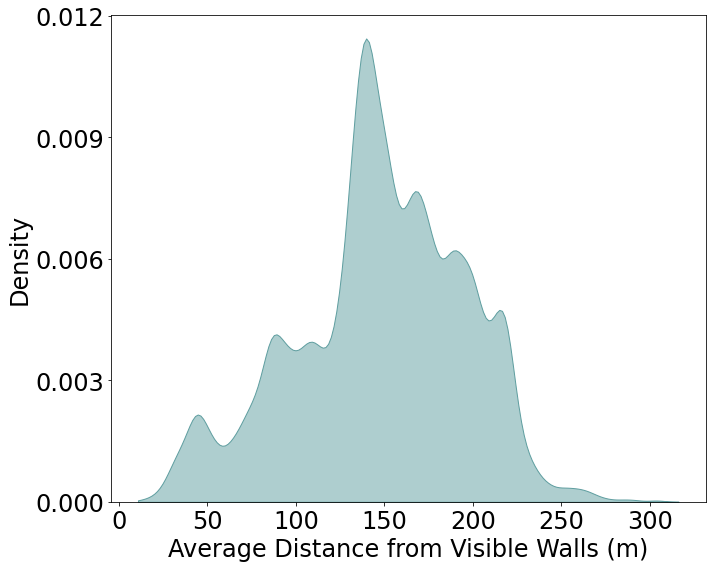

In [46]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='avg_distance_to_walls', cut=0,color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Average Distance from Visible Walls (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks([0, 0.003, 0.006, 0.009, 0.012],fontsize=24)
plt.savefig('avg_dist_walls_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


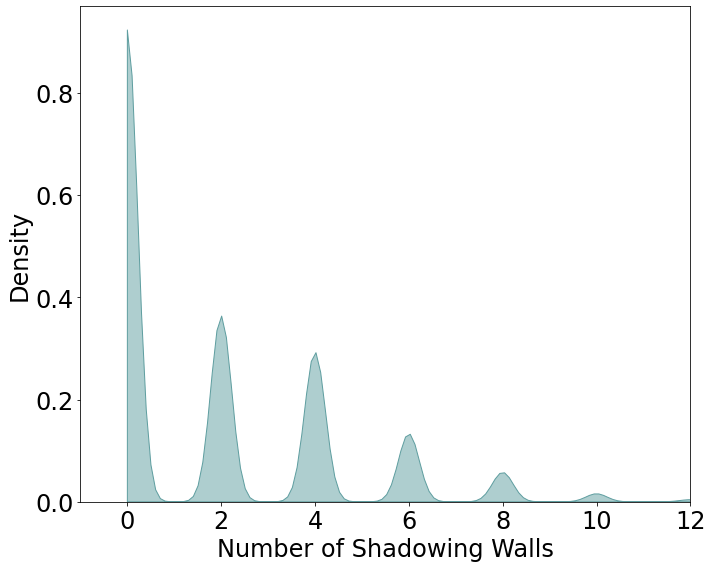

In [57]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='walls_pen',  cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Number of Shadowing Walls", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(right=12)
plt.savefig('walls_pen_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


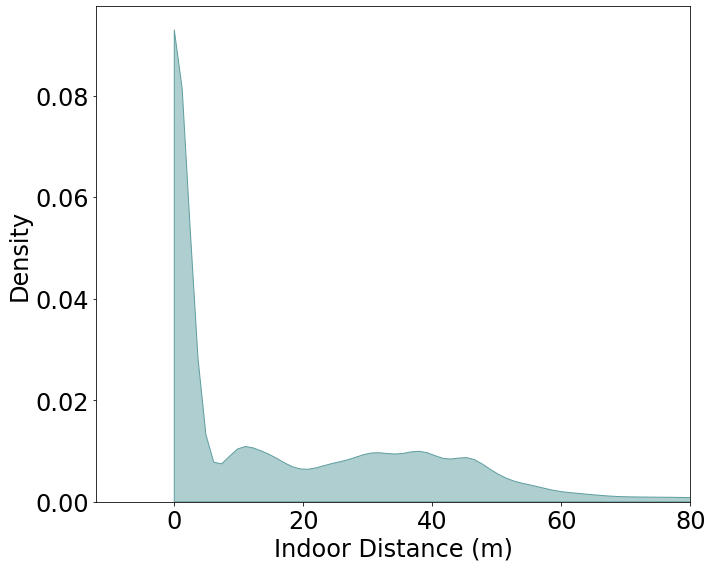

In [63]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='indoor_distance', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Indoor Distance (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.xlim(right=80)
plt.yticks(fontsize=24)
plt.savefig('indoor_dist_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


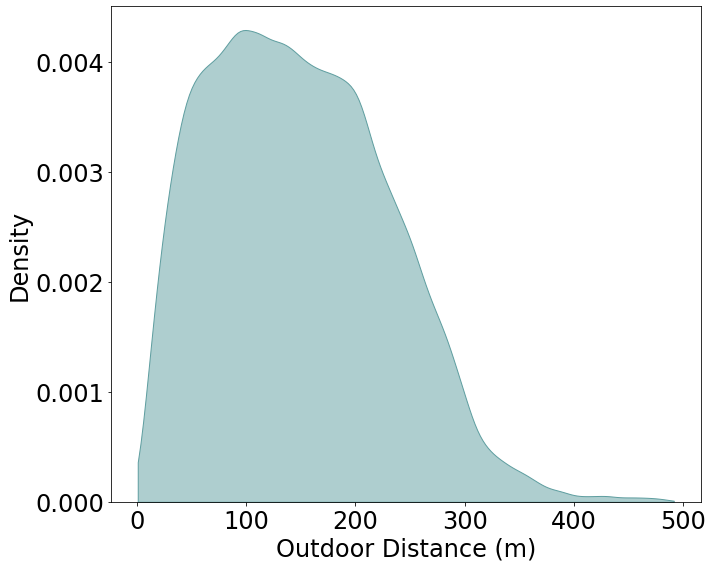

In [64]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='outdoor_distance', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Outdoor Distance (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('outdoor_dist_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


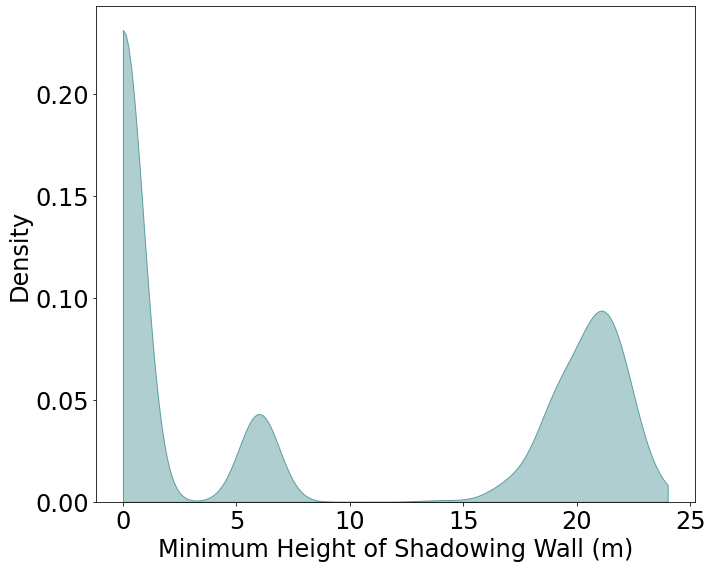

In [65]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='min_wall_height', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Minimum Height of Shadowing Wall (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('min_height_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


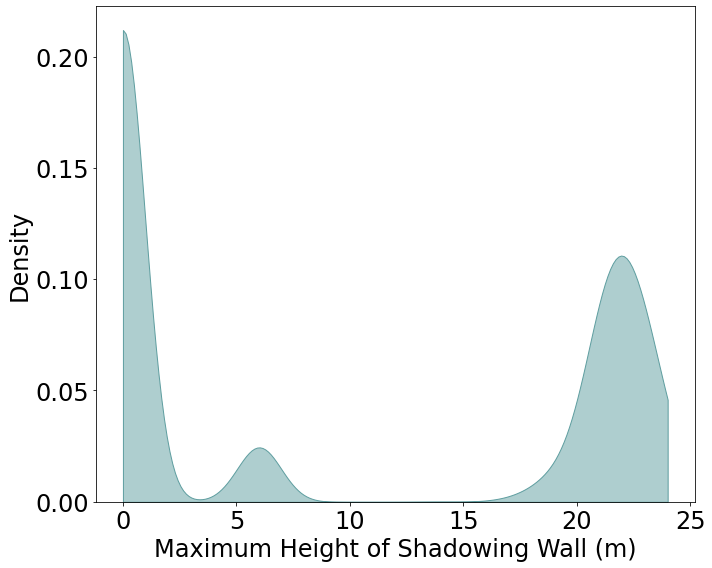

In [67]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='max_wall_height', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Maximum Height of Shadowing Wall (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2],fontsize=24)
plt.savefig('max_height_kde.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


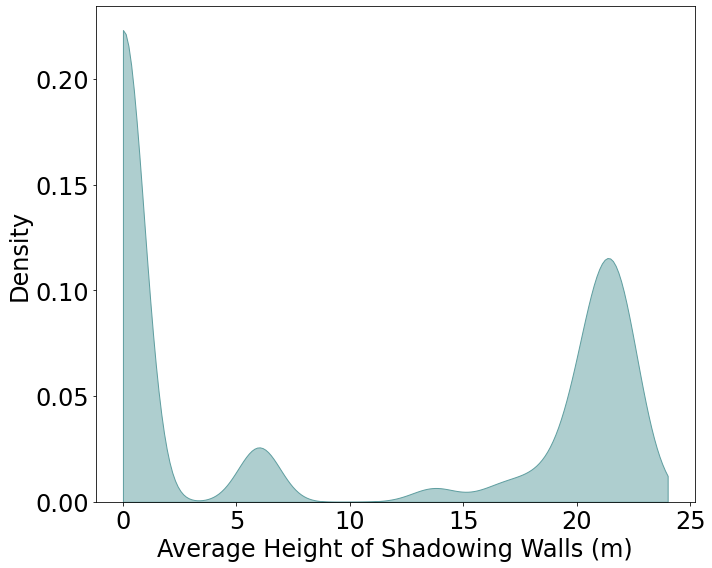

In [68]:
plt.figure(figsize=(10, 8),layout='tight')
sns.kdeplot(data=plos, x='avg_wall_height', cut=0, color = 'cadetblue', fill=True, alpha=0.5)
plt.xlabel("Average Height of Shadowing Walls (m)", fontsize=24)
plt.ylabel("Density", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig('avg_height_kde.eps', format='eps')

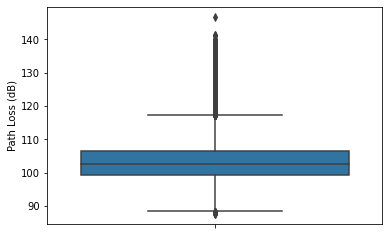

In [8]:
g2 = sns.boxplot(y = 'Path_loss_average',data = pathloss_with_outliers)
g2.set_ylabel("Path Loss (dB)")
plt.savefig('pathloss_box_plot_with_outliers.eps', format='eps')

In [3]:
print("Shape with outliers: ", pathloss_with_outliers.shape)
Q1 = pathloss_with_outliers['Path_loss_average'].quantile(0.25)
Q3 = pathloss_with_outliers['Path_loss_average'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)
 
# Create arrays of Boolean values indicating the outlier rows
pathloss = pathloss_with_outliers[~((pathloss_with_outliers['Path_loss_average']>=upper) | (pathloss_with_outliers['Path_loss_average']<=lower) )]
 
# Print the new shape of the DataFrame
print("New Shape after outlier removal: ", pathloss.shape)

Shape with outliers:  (158406, 14)
88.40432500000003
117.38693833333332
New Shape after outlier removal:  (147851, 14)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


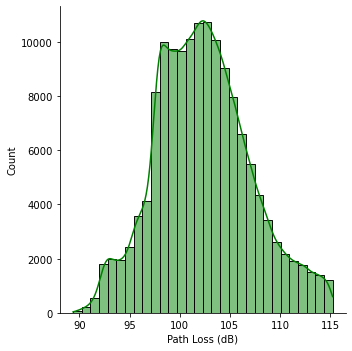

In [16]:
g = sns.displot(pathloss['Path_loss_average'],kde=True,bins=30, color='g')
g.set_axis_labels("Path Loss (dB)", "Count")
g.set_titles("Path Loss Distribution")
plt.savefig('pathloss_distribution_after_outliers_removal.eps', format='eps')

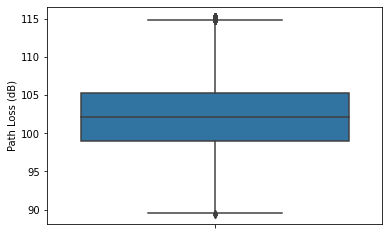

In [17]:
g2 = sns.boxplot(y = 'Path_loss_average',data = pathloss)
g2.set_ylabel("Path Loss (dB)")
plt.savefig('pathloss_box_plot_outliers_removed.eps', format='eps')

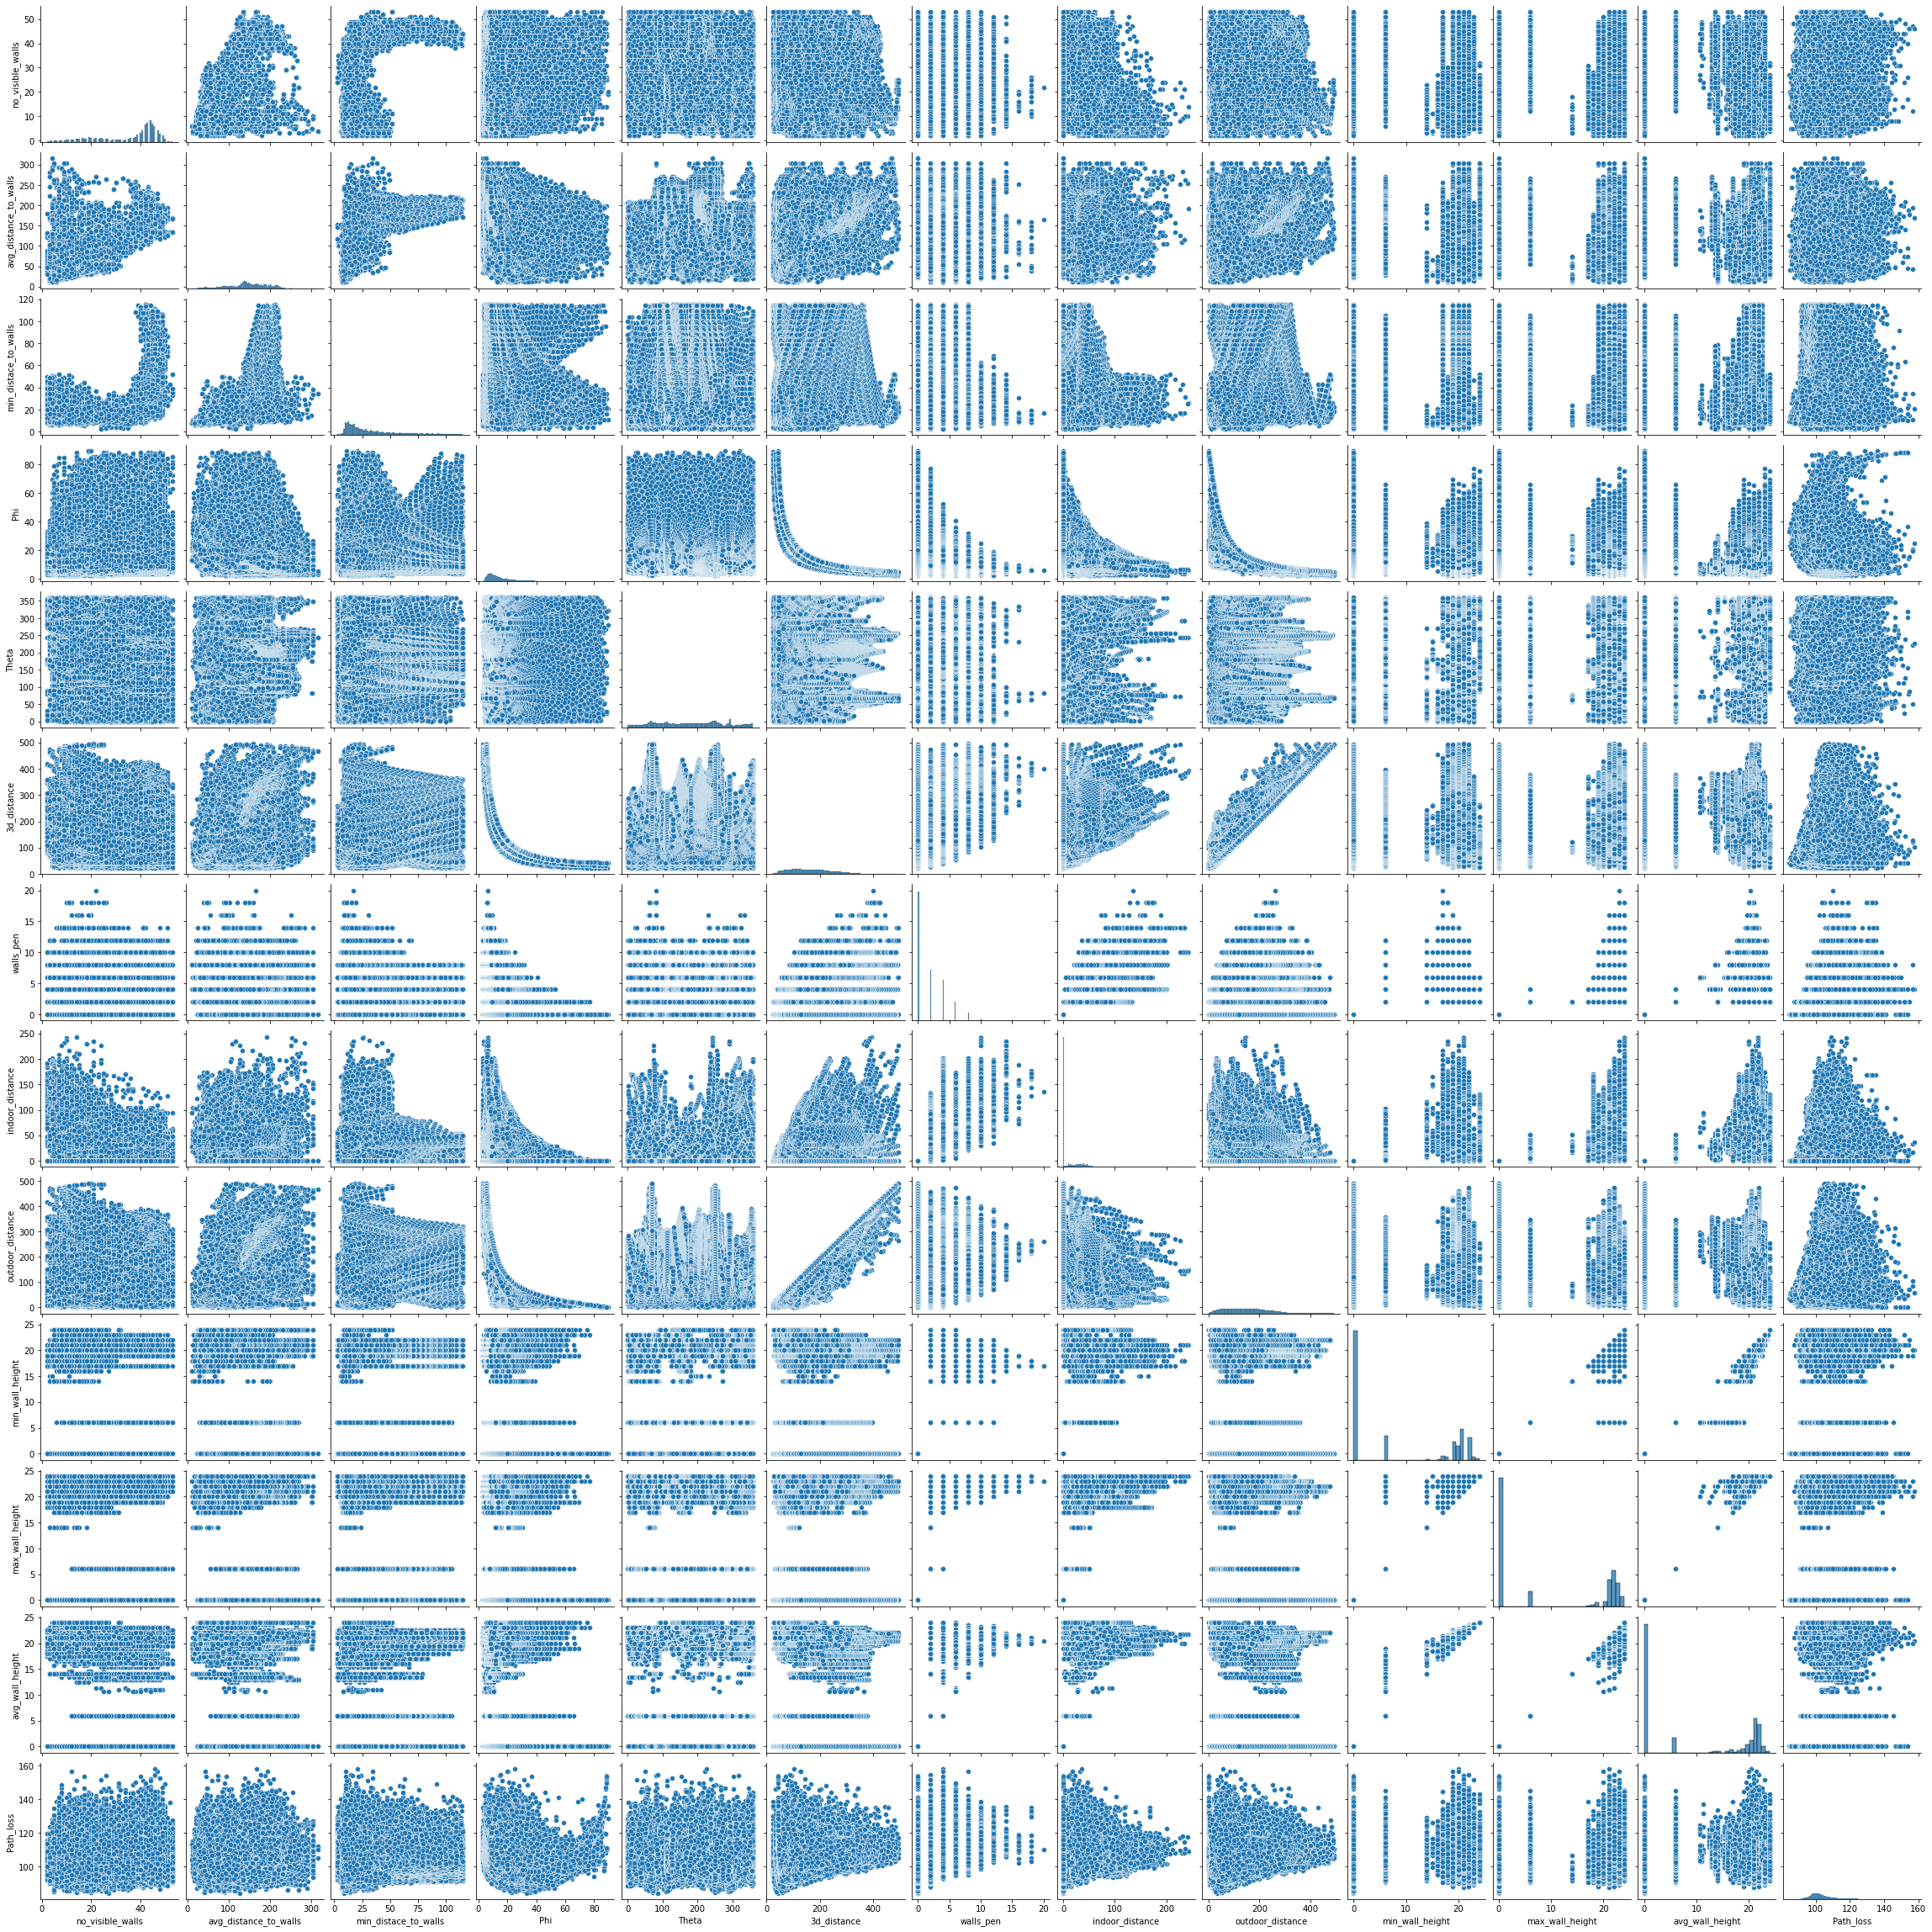

In [3]:
sns.pairplot(pathloss,diag_kind='hist')

In [3]:
print(pathloss.describe())

       no_visible_walls  avg_distance_to_walls  min_distace_to_walls  \
count     158406.000000          158406.000000         158406.000000   
mean          35.512335             147.544574             36.537275   
std           12.394897              47.935583             27.364797   
min            2.000000              10.942800              2.707270   
25%           26.000000             120.395000             15.239800   
50%           41.000000             148.768000             25.991300   
75%           45.000000             182.416000             51.385900   
max           53.000000             316.167000            115.160000   

                 Phi          Theta    3d_distance      walls_pen  \
count  158406.000000  158406.000000  158406.000000  158406.000000   
mean       16.270800     181.052123     170.987647       1.889209   
std        12.228176      97.289948      83.152306       2.440936   
min         2.724330       0.006370      23.403000       0.000000   
25%   

<AxesSubplot:ylabel='Path_loss_average'>

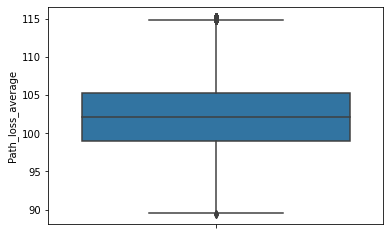

In [50]:
sns.boxplot(y = 'Path_loss_average',data = pathloss)

<AxesSubplot:ylabel='Path_loss'>

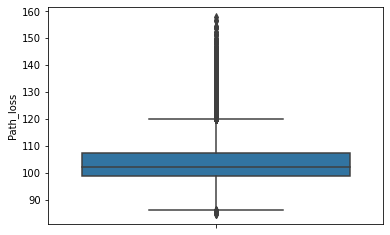

In [5]:
sns.boxplot(y = 'Path_loss',data = pathloss)

<AxesSubplot:xlabel='Theta', ylabel='Path_loss'>

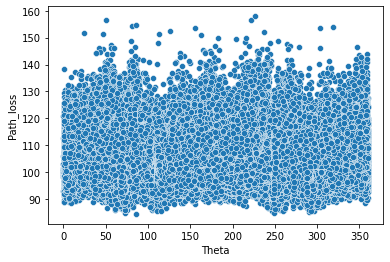

In [8]:
sns.scatterplot(x='Theta',y='Path_loss',data=pathloss)

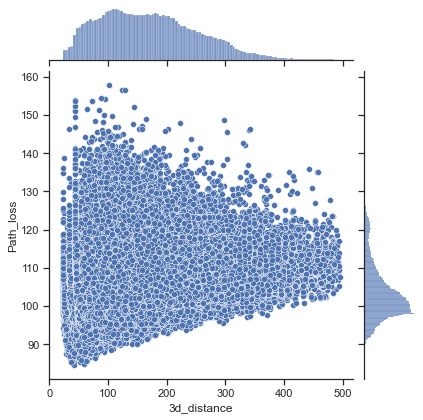

In [9]:
sns.jointplot(data=pathloss, x="3d_distance", y="Path_loss")

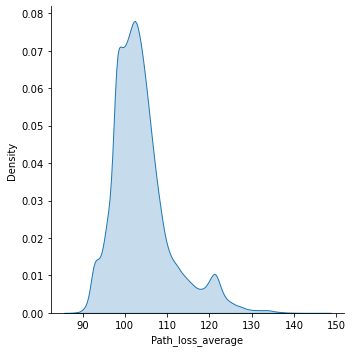

In [5]:
sns.displot(pathloss, x="Path_loss_average", kind="kde", fill=True)

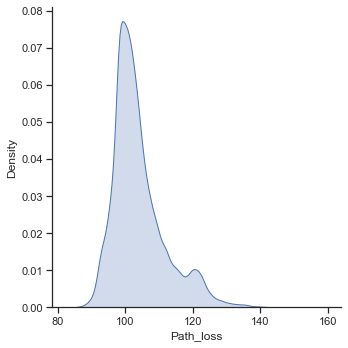

In [8]:
sns.displot(pathloss, x="Path_loss", kind="kde", fill=True)

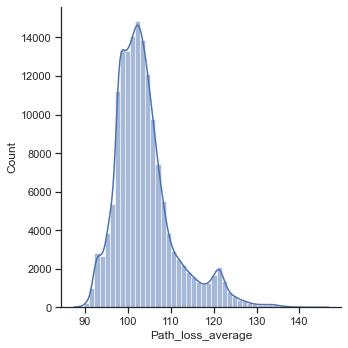

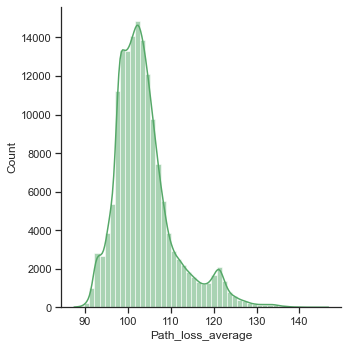

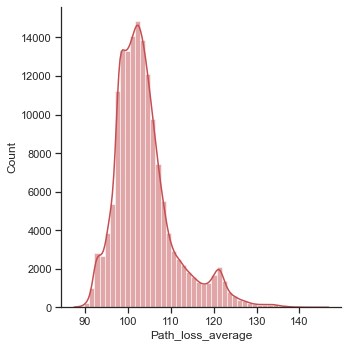

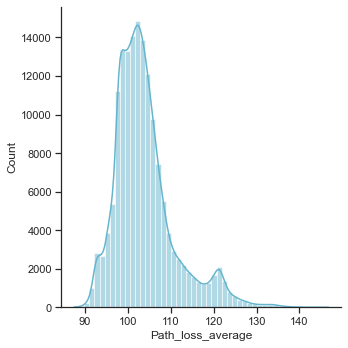

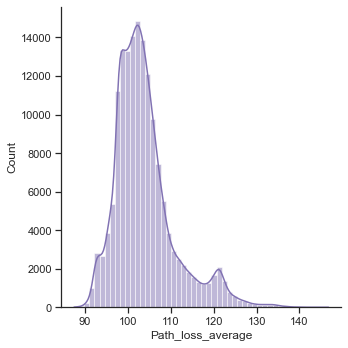

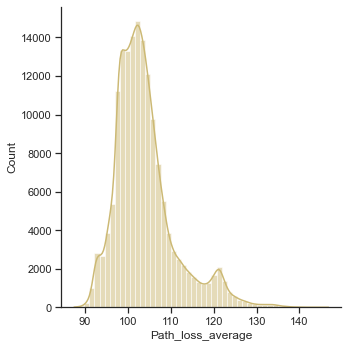

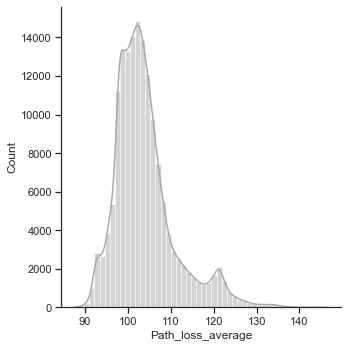

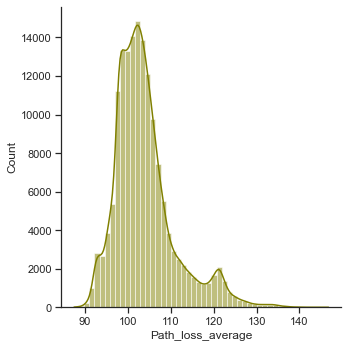

In [6]:
sns.set(color_codes=True)
sns.set_style('ticks')
for colr in ['b', 'g', 'r', 'c', 'm', 'y','darkgrey','olive']:    
    sns.displot(pathloss['Path_loss_average'],kde=True,bins=50, color=colr)
    plt.show
    

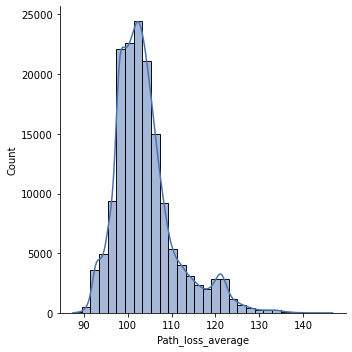

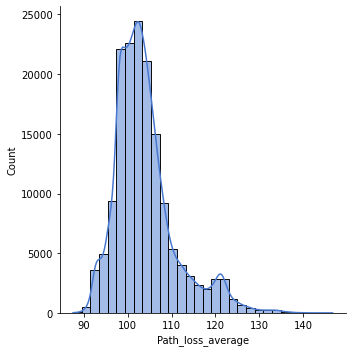

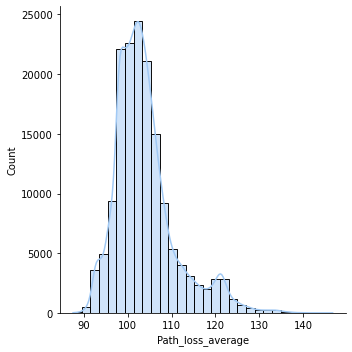

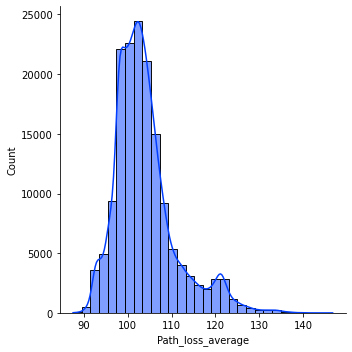

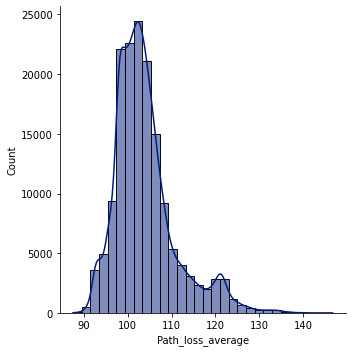

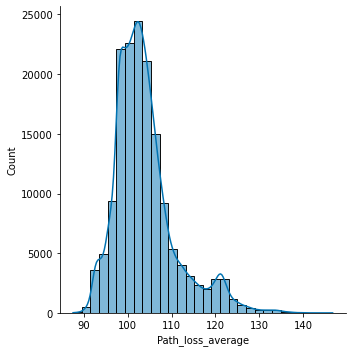

In [4]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
for p in palettes:
    sns.set_palette(p)
    sns.displot(pathloss_with_outliers['Path_loss_average'],kde=True,bins=30)
    

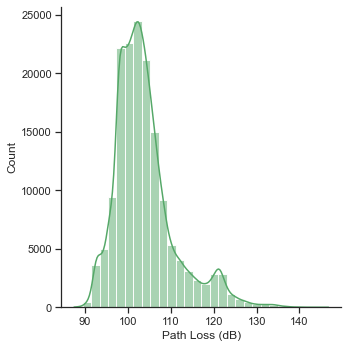

In [7]:
g = sns.displot(pathloss['Path_loss_average'],kde=True,bins=30, color='g')
g.set_axis_labels("Path Loss (dB)", "Count")
g.set_titles("Path Loss Distribution")


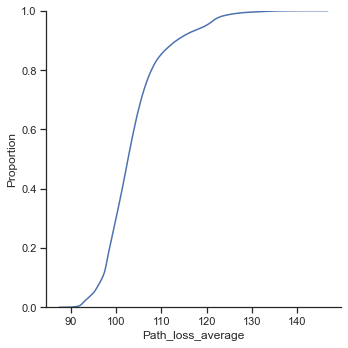

In [8]:
sns.displot(pathloss['Path_loss_average'],kind='ecdf')

<AxesSubplot:xlabel='3d_distance', ylabel='Path_loss'>

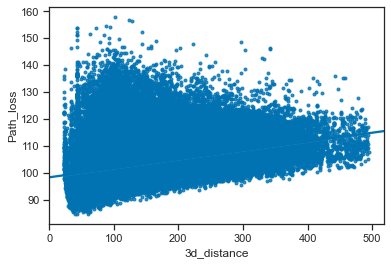

In [41]:
sns.regplot(x='3d_distance', y='Path_loss',marker = '.',truncate = False,x_ci = "sd",data=pathloss)

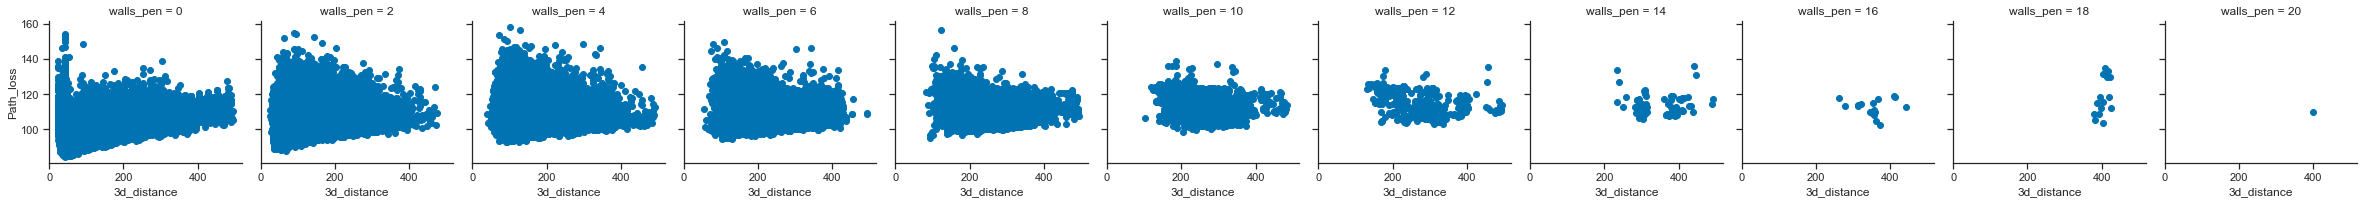

In [44]:
g = sns.FacetGrid(pathloss, col='walls_pen')
g.map(plt.scatter, '3d_distance', 'Path_loss')

<AxesSubplot:>

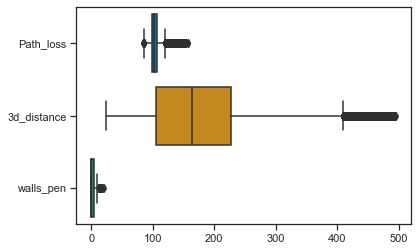

In [55]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
sns.set_palette('colorblind')
sns.boxplot(data=pathloss[["Path_loss","3d_distance", "walls_pen"]], orient="h")

## 2. Data Split before Train and Test 

In [3]:
X = pathloss.drop(["Path_loss_average"],axis=1).values
y = pathloss["Path_loss_average"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(len(y_train))
print(len(y_test))

118804
39602


In [10]:
print(X_train_scaled)

[[ 0.44202003  0.0722692  -0.87751444 ... -0.90802388 -0.90581705
  -1.24294946]
 [ 0.92631602  0.89752659 -0.28227047 ... -0.90802388 -0.90581705
  -1.24294946]
 [ 0.36130403  1.40880216 -0.34654487 ... -0.90802388 -0.90581705
  -1.24294946]
 ...
 [-1.01086794 -1.45948073 -0.70286259 ... -0.90802388 -0.90581705
   0.90820928]
 [ 0.60345203  1.04478131  2.60591951 ... -0.90802388 -0.90581705
   0.90820928]
 [-1.33373194 -0.69306672 -0.82555296 ... -0.90802388 -0.90581705
   0.90820928]]


### 1. Linear Regression 

In [4]:
# load package
from sklearn.linear_model import LinearRegression
# Set up and fit the linear regressor
#kf = KFold(n_splits=12,shuffle=True,random_state=42)
lin_reg = LinearRegression()
#cv_results = cross_val_score(lin_reg,X_train,y_train,cv=kf)
#print("Cross validation R-squared score is:",cv_results)
lin_reg.fit(X_train_scaled, y_train)
r_squared_error = lin_reg.score(X_train_scaled, y_train)
print("R-Squared error on train dataset is:",r_squared_error)
predicted_train = lin_reg.predict(X_train_scaled)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("Train RMSE error is: ",train_error, " dB.")
predicted_test = lin_reg.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = lin_reg.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

R-Squared error on train dataset is: 0.45259052179744075
Train RMSE error is:  5.199522383979627  dB.
Test RMSE error is:  5.17947241077764  dB.
R-Squared error on test dataset is: 0.45571173723966185
Test MAPE error is: 0.034843034135145314
Test MAE error is: 3.7221638834341406


<class 'numpy.ndarray'>
   True_values  Predicted_values
0     98.42698         99.307729
1    107.93980        103.795942
2     99.48324        100.346041
3    135.93880        106.167233
4    100.19494         98.848838


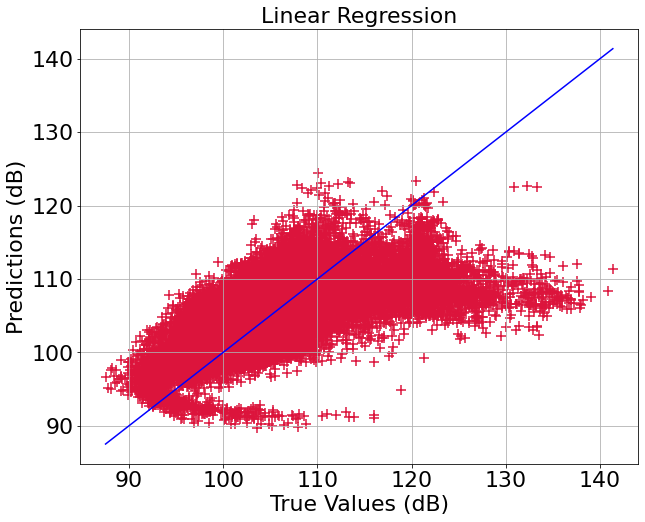

In [18]:
print(type(predicted_test))
#df=pd.Dataframe()
#df['True_value'] = pd.Series(y_test)
df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.figure(figsize=(10, 8))
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',s=100)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=22)
plt.ylabel('Predictions (dB)', fontsize=22)
plt.title('Linear Regression', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('LR_test_data_results_new.eps', format='eps')

In [18]:
cum_sum = 0
cum_sum_squared = 0
mape_1 = 0
cum_sum_pl_mean_Squared = 0
pl_mean = true_value.mean()
for i in range(0,len(true_value)):
    comp = true_value[i] - predicted_value[i]
    if comp < 0:
        cum_sum = cum_sum - comp
        comp = comp*-1
    else:
        cum_sum = cum_sum + comp    
    mape_1 = mape_1 + (comp/true_value[i])*100
    cum_sum_squared = cum_sum_squared + (((true_value[i] - predicted_value[i]))**2)
    cum_sum_pl_mean_Squared = cum_sum_pl_mean_Squared + (((true_value[i] - pl_mean))**2)
MAE_LR = cum_sum/len(true_value)
RMSE_1 = cum_sum_squared/len(true_value)
RMSE_LR = np.sqrt(RMSE_1)
MAPE = mape_1/len(true_value)
r_square = cum_sum_squared/cum_sum_pl_mean_Squared
R_square = 1 - r_square
print("MEAN ABSOLUTE ERROR (MAE): ",MAE_LR, "dB.")  
print("ROOT MEAN SQUARE ERROR (RMSE): ",RMSE_LR, "dB.")
print("MEAN ABSOLUTE PERCENT ERROR (MAPE): ",MAPE, "%")
print("R^2 Score: ",R_square)

MEAN ABSOLUTE ERROR (MAE):  3.7221638834341557 dB.
ROOT MEAN SQUARE ERROR (RMSE):  5.179472410777627 dB.
MEAN ABSOLUTE PERCENT ERROR (MAPE):  3.4843034135145525 %
R^2 Score:  0.45571173723966496


In [18]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set = evaluation_set.drop(["Path_loss_average"],axis=1).values
X_eval_set_scaled = scaler.transform(X_eval_set)
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_lr'] = 0

In [19]:
# Evaluate on Evaluation Dataset
predicted_eval_set = lin_reg.predict(X_eval_set_scaled)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("R^2 score: ",lin_reg.score(X_eval_set_scaled, y_eval_set), "dB.")
print("RMSE: ",evaluation_error, "dB.")
print("MAE: ",mean_absolute_error(y_eval_set, predicted_eval_set), "dB.")
print("MAE: ",mean_absolute_percentage_error(y_eval_set, predicted_eval_set), "dB.")

R^2 score:  0.15728306499674083 dB.
RMSE:  4.6846529113989295 dB.
MAE:  3.6075483976070544 dB.
MAE:  0.03387747838628315 dB.


In [37]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_lr'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("linear_regression_validation_set_04_tx45_scaled.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


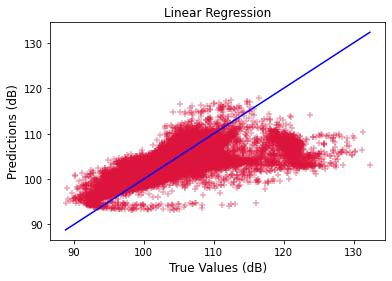

In [67]:
# Plot predicted vs actual pathloss plot for Linear Regression Model
#df1 = pd.read_excel('linear_regression_validation_set_01_tx25.xlsx')
#df2 = pd.read_excel('linear_regression_validation_set_01_tx35.xlsx')
#df3 = pd.read_excel('linear_regression_validation_set_01_tx45.xlsx')
df4 = pd.read_excel('linear_regression_validation_set_02_tx25.xlsx')
df5 = pd.read_excel('linear_regression_validation_set_02_tx45.xlsx')
df6 = pd.read_excel('linear_regression_validation_set_03_tx25.xlsx')
df7 = pd.read_excel('linear_regression_validation_set_03_tx35.xlsx')
df8 = pd.read_excel('linear_regression_validation_set_03_tx45.xlsx')
df9 = pd.read_excel('linear_regression_validation_set_04_tx25.xlsx')
df10 = pd.read_excel('linear_regression_validation_set_04_tx45.xlsx')
df_concat = pd.concat([df4, df5, df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_lr"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.4)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Linear Regression', fontsize=12)
#plt.axis('equal')
plt.savefig('Pathloss_predicted_vs_actual_LR.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


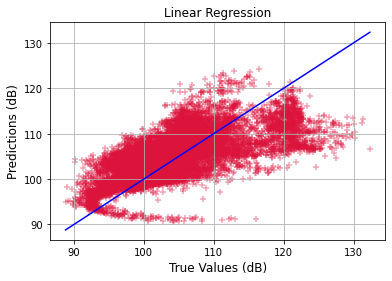

In [40]:
df4 = pd.read_excel('linear_regression_validation_set_02_tx25_scaled.xlsx')
df5 = pd.read_excel('linear_regression_validation_set_02_tx45_scaled.xlsx')
df6 = pd.read_excel('linear_regression_validation_set_03_tx25_scaled.xlsx')
df7 = pd.read_excel('linear_regression_validation_set_03_tx35_scaled.xlsx')
df8 = pd.read_excel('linear_regression_validation_set_03_tx45_scaled.xlsx')
df9 = pd.read_excel('linear_regression_validation_set_04_tx25_scaled.xlsx')
df10 = pd.read_excel('linear_regression_validation_set_04_tx45_scaled.xlsx')
df_concat = pd.concat([df4, df5, df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_lr"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.4)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Linear Regression', fontsize=12)
plt.grid()
plt.savefig('Pathloss_predicted_vs_actual_LR_scaled.eps', format='eps')

In [45]:
print(true_value)

0        122.672000
1        122.143333
2        122.319750
3        122.643000
4        122.775750
            ...    
18199    108.205750
18200    109.004250
18201    110.655000
18202    112.316333
18203    110.541667
Name: Path_loss_average, Length: 18204, dtype: float64


In [58]:
cum_sum = 0
cum_sum_squared = 0
mape_1 = 0
cum_sum_pl_mean_Squared = 0
pl_mean = true_value.mean()
for i in range(0,len(true_value)):
    comp = true_value[i] - predicted_value[i]
    if comp < 0:
        cum_sum = cum_sum - comp
        comp = comp*-1
    else:
        cum_sum = cum_sum + comp    
    mape_1 = mape_1 + (comp/true_value[i])*100
    cum_sum_squared = cum_sum_squared + (((true_value[i] - predicted_value[i]))**2)
    cum_sum_pl_mean_Squared = cum_sum_pl_mean_Squared + (((true_value[i] - pl_mean))**2)
MAE_LR = cum_sum/len(true_value)
RMSE_1 = cum_sum_squared/len(true_value)
RMSE_LR = np.sqrt(RMSE_1)
MAPE = mape_1/len(true_value)
r_square = cum_sum_squared/cum_sum_pl_mean_Squared
R_square = 1 - r_square
print("MEAN ABSOLUTE ERROR (MAE): ",MAE_LR, "dB.")  
print("ROOT MEAN SQUARE ERROR (RMSE): ",RMSE_LR, "dB.")
print("MEAN ABSOLUTE PERCENT ERROR (MAPE): ",MAPE, "%")
print("R^2 Score: ",R_square)

MEAN ABSOLUTE ERROR (MAE):  3.6111959129154747 dB.
ROOT MEAN SQUARE ERROR (RMSE):  4.813695284498711 dB.
MEAN ABSOLUTE PERCENT ERROR (MAPE):  3.428192595519291 %
R^2 Score:  0.4831652943703939


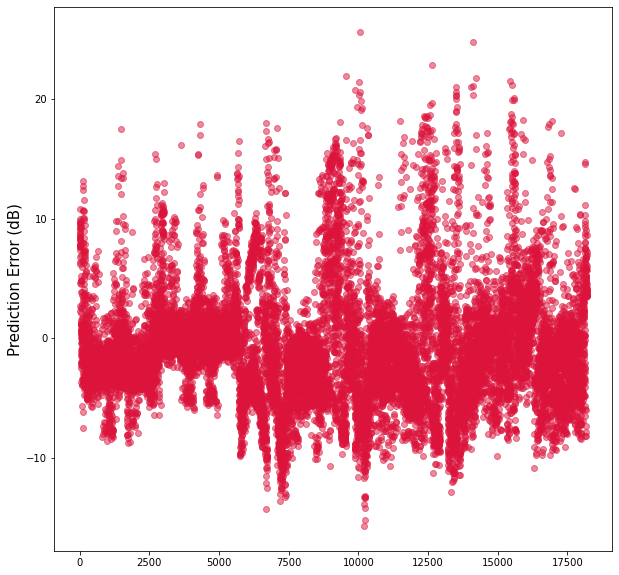

In [39]:
plt.figure(figsize=(10,10))
plt.plot(true_value - predicted_value,marker='o',linestyle='', color = 'crimson',alpha=0.5)
plt.ylabel('Prediction Error (dB)', fontsize=15)
plt.show()

### 1.2 Linear Regression Using Scaled Features and Pipeline

In [6]:
X = pathloss.drop(["Path_loss"],axis=1).values
y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('lr',LinearRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
lr_scaled = pipeline.fit(X_train,y_train)
y_predict = lr_scaled.predict(X_test)
print("R-Squared score on Scaled Data is:",lr_scaled.score(X_test,y_test))

R-Squared score on Scaled Data is: 0.37972637630953743


### 2. K Nearest Neighbors 

In [5]:
knn = KNeighborsRegressor()
# Set up and fit the linear regressor
kf = KFold(n_splits=12,shuffle=True,random_state=42)
cv_results = cross_val_score(knn,X_train,y_train,cv=kf)
print("Cross validation R-squared score is:",cv_results)
knn.fit(X_train, y_train)
r_squared_error = knn.score(X_train, y_train)
print("R-Squared error on train dataset is:",r_squared_error)
predicted_train = knn.predict(X_train)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("train error is: ",train_error, " dB.")
predicted_test = knn.predict(X_test)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("test error is: ",test_error, " dB.")

Cross validation R-squared score is: [0.85127911 0.84957577 0.86997066 0.86084711 0.85372517 0.85034807
 0.85371173 0.84484658 0.84724987 0.86371601 0.86132772 0.854089  ]
R-Squared error on train dataset is: 0.9142109903438496
train error is:  2.058368480576327  dB.
test error is:  2.642433813427684  dB.


In [15]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_02_tx25.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set = evaluation_set.drop(["Path_loss_average"],axis=1).values
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_knn'] = 0

In [16]:
# Evaluate on Evaluation Dataset
predicted_eval_set = knn.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("Prediction Error on Evaluation Dataset is:",evaluation_error, "dB.")

Prediction Error on Evaluation Dataset is: 3.1615073004412473 dB.


In [17]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_knn'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("knn_validation_set_02_tx25.xlsx",index=False)

### 2.2 KNN Hyperparameter Tuning 

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'weights':['distance'],
          'algorithm':['ball_tree'],
          'leaf_size':[30]}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn,params,scoring='r2',refit=True,return_train_score=True,cv=2, verbose=4)
knn_cv.fit(X_train_scaled,y_train)
print("Best score after hyper-parameter tuning is:",knn_cv.best_score_)
print("Best Parameters after hyper-parameter tuning are:",knn_cv.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.788) total time=  41.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.793) total time=  47.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, weights=distance;, score=(train=1.000, test=0.829) total time= 1.4min
[CV 2/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, weights=distance;, score=(train=1.000, test=0.832) total time= 1.7min
[CV 1/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.836) total time= 1.2min
[CV 2/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.839) total time= 1.7min
[CV 1/2] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance;, score=(train=1.000, test=0.838) total time= 1.8min
[CV 2/2]

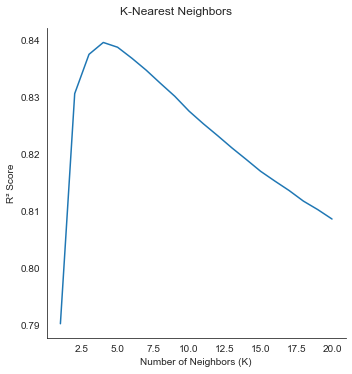

In [43]:
#cv_results_df = pd.DataFrame(knn_cv.cv_results_)
#cv_results_df.to_excel("knn_hyperparameter_tuning_gridsearch.xlsx",index=False)
#print(cv_results_df.head(2))
sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_n_neighbors",y="mean_test_score", kind="line")
g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Number of Neighbors (K)", ylabel="R\u00b2 Score")

In [10]:
best_model_knn = knn_cv.best_estimator_
predicted_train = best_model_knn.predict(X_train)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("Train error is: ",train_error, " dB.")
y_predict = best_model_knn.predict(X_test)
test_error_svr = mean_squared_error(y_test,y_predict,squared = False)
print("RMS Error on Test Data is:",test_error_svr,"dB.")

Train error is:  0.0  dB.
RMS Error on Test Data is: 2.0640543470668775 dB.


In [19]:
best_model_knn = KNeighborsRegressor(n_neighbors=4,weights='distance',algorithm='ball_tree',leaf_size=30)
best_model_knn.fit(X_train_scaled, y_train)
predicted_test = best_model_knn.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_knn.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

Test RMSE error is:  2.4759196412677436  dB.
R-Squared error on test dataset is: 0.8756255964370218
Test MAPE error is: 0.013996074471530756
Test MAE error is: 1.4828273680359798


<class 'numpy.ndarray'>
   True_values  Predicted_values
0     98.42698         99.178713
1    107.93980        103.487278
2     99.48324         98.763127
3    135.93880        136.307898
4    100.19494         99.360132


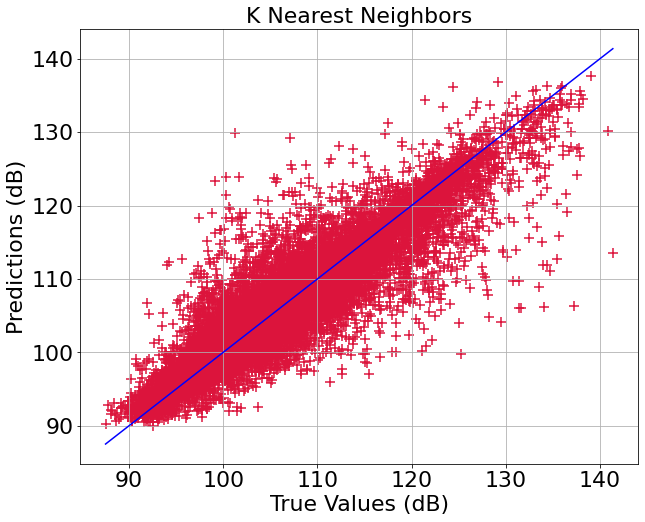

In [20]:
print(type(predicted_test))
#df=pd.Dataframe()
#df['True_value'] = pd.Series(y_test)
df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.figure(figsize=(10, 8))
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',s=100)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=22)
plt.ylabel('Predictions (dB)', fontsize=22)
plt.title('K Nearest Neighbors', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('knn_test_data_results_new.eps', format='eps')

In [28]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set = evaluation_set.drop(["Path_loss_average"],axis=1).values
X_eval_set_scaled = scaler.transform(X_eval_set)
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_knn'] = 0

In [29]:
# Evaluate on Evaluation Dataset
predicted_eval_set = best_model_knn.predict(X_eval_set_scaled)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("R^2 score: ",best_model_knn.score(X_eval_set_scaled, y_eval_set), "dB.")
print("RMSE: ",evaluation_error, "dB.")
print("MAE: ",mean_absolute_error(y_eval_set, predicted_eval_set), "dB.")
print("MAPE: ",mean_absolute_percentage_error(y_eval_set, predicted_eval_set), "dB.")

R^2 score:  0.5660352380949747 dB.
RMSE:  3.3617374449370643 dB.
MAE:  2.1339080508959056 dB.
MAPE:  0.019925529767506566 dB.


In [30]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_knn'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("knn_validation_set_04_tx45_scaled.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


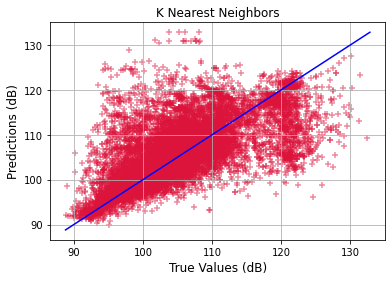

In [32]:
#Now plot the results
df4 = pd.read_excel('knn_validation_set_02_tx25_scaled.xlsx')
df5 = pd.read_excel('knn_validation_set_02_tx45_scaled.xlsx')
df6 = pd.read_excel('knn_validation_set_03_tx25_scaled.xlsx')
df7 = pd.read_excel('knn_validation_set_03_tx35_scaled.xlsx')
df8 = pd.read_excel('knn_validation_set_03_tx45_scaled.xlsx')
df9 = pd.read_excel('knn_validation_set_04_tx25_scaled.xlsx')
df10 = pd.read_excel('knn_validation_set_04_tx45_scaled.xlsx')
df_concat = pd.concat([df4, df5, df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_knn"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.5)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('K Nearest Neighbors', fontsize=12)
plt.grid()
plt.savefig('Pathloss_predicted_vs_actual_KNN_scaled.eps', format='eps')

### 2.3 KNN using Scaled Parameters and Pipeline 

In [38]:
#X = pathloss.drop(["Path_loss_average"],axis=1).values
#y = pathloss["Path_loss_average"].values
steps = [('scaler', StandardScaler()), ('knn',KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =  10, n_neighbors = 4, weights = 'distance'))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
knn_scaled = pipeline.fit(X_train,y_train)
y_predict = knn_scaled.predict(X_test)
print("R-Squared score on Scaled Data is:",knn_scaled.score(X_test,y_test))
test_error_svr = mean_squared_error(y_test,y_predict,squared = False)
print("RMS Error on Test Data is:",test_error_svr,"dB.")

R-Squared score on Scaled Data is: 0.8328148338633662
RMS Error on Test Data is: 2.0627703930077415 dB.


In [39]:
predicted_train = knn_scaled.predict(X_train)
print("R-Squared score on Scaled Train Data is:",knn_scaled.score(X_train,y_train))
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("RMSE train error is: ",train_error, " dB.")

R-Squared score on Scaled Train Data is: 1.0
RMSE train error is:  0.0  dB.


In [58]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set = evaluation_set.drop(["Path_loss_average"],axis=1).values
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_knn'] = 0

In [59]:
# Evaluate on Evaluation Dataset
predicted_eval_set = knn_scaled.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("Prediction Error on Evaluation Dataset is:",evaluation_error, "dB.")

Prediction Error on Evaluation Dataset is: 3.5293236399158268 dB.


In [60]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_knn'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("knn_validation_set_04_tx45_scaled.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


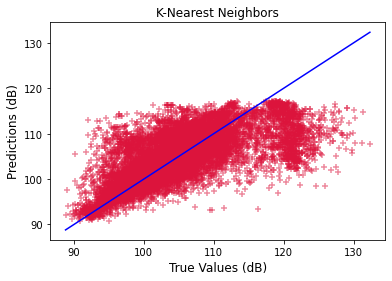

In [65]:
#Now plot the results
df4 = pd.read_excel('knn_validation_set_02_tx25_scaled.xlsx')
df5 = pd.read_excel('knn_validation_set_02_tx45_scaled.xlsx')
df6 = pd.read_excel('knn_validation_set_03_tx25_scaled.xlsx')
df7 = pd.read_excel('knn_validation_set_03_tx35_scaled.xlsx')
df8 = pd.read_excel('knn_validation_set_03_tx45_scaled.xlsx')
df9 = pd.read_excel('knn_validation_set_04_tx25_scaled.xlsx')
df10 = pd.read_excel('knn_validation_set_04_tx45_scaled.xlsx')
df_concat = pd.concat([df4, df5, df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_knn"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.5)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('K-Nearest Neighbors', fontsize=12)
#plt.axis('equal')
plt.savefig('Pathloss_predicted_vs_actual_KNN_scaled.eps', format='eps')

### 3. Random Forest Regression 

In [4]:
rf = RandomForestRegressor()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [38]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_rf = { 'n_estimators': [100,500,1000],
               'max_depth': [2,10,50],
               'min_samples_leaf': [2,10,50],
               'max_features': ['sqrt','auto']}

grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 3, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_rf.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_rf.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-06-24 16:16:01.881662
The current date and time before Fitting  2023-06-24 16:16:01.889654
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=(train=0.394, test=0.399) total time=   6.0s
[CV 2/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=(train=0.395, test=0.395) total time=   5.7s
[CV 3/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=(train=0.397, test=0.391) total time=   5.9s
[CV 1/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=(train=0.397, test=0.402) total time=  26.7s
[CV 2/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=(train=0.395, test=0.395) total time=  13.4s
[CV 3/3] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=(train=0.399, test=0.3

[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=500;, score=(train=0.785, test=0.760) total time= 1.1min
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=(train=0.787, test=0.756) total time= 2.1min
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=(train=0.784, test=0.760) total time= 2.2min
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=(train=0.785, test=0.760) total time= 2.1min
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100;, score=(train=0.774, test=0.747) total time=  12.6s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100;, score=(train=0.771, test=0.753) total time=  12.4s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100;, score=(train=0.772, test=0.752) total time=  12.8s
[CV 1/3] END max_depth=10, max_features=sq

[CV 3/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=100;, score=(train=0.866, test=0.816) total time=  18.8s
[CV 1/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=500;, score=(train=0.869, test=0.816) total time= 1.5min
[CV 2/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=500;, score=(train=0.867, test=0.820) total time= 1.5min
[CV 3/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=500;, score=(train=0.867, test=0.818) total time= 1.5min
[CV 1/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=1000;, score=(train=0.869, test=0.816) total time= 2.9min
[CV 2/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=1000;, score=(train=0.868, test=0.820) total time= 3.0min
[CV 3/3] END max_depth=50, max_features=sqrt, min_samples_leaf=10, n_estimators=1000;, score=(train=0.867, test=0.818) total time= 6.0min
[CV 1/3] END max_depth=50, max_feature

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.767621      0.111963         0.220353        0.000897   
1      18.453612      5.735898         0.566412        0.055799   

  param_max_depth param_max_features param_min_samples_leaf  \
0               2               sqrt                      2   
1               2               sqrt                      2   

  param_n_estimators                                             params  \
0                100  {'max_depth': 2, 'max_features': 'sqrt', 'min_...   
1                500  {'max_depth': 2, 'max_features': 'sqrt', 'min_...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.398620           0.395463           0.390667         0.394917   
1           0.401886           0.395314           0.391947         0.396382   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003270               54            0.394094            

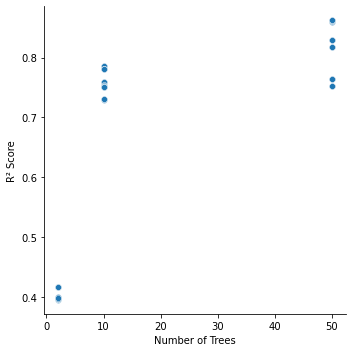

In [46]:
#cv_results_df = pd.DataFrame(grid_rf.cv_results_)
#cv_results_df.to_excel("RF_initial_hyperparameter_tuning_gridsearch.xlsx",index=False)
print(cv_results_df.head(2))
#sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_max_depth",y="mean_test_score", kind="scatter")
#g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Number of Trees", ylabel="R\u00b2 Score")

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_rf = { 'n_estimators': [100,700,1000],
               'max_depth': [50],
               'min_samples_leaf': [1,2,3,4,5],
               'min_samples_split':[2,5,10],
               'max_features': ['auto']}

grid_rf_final = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 3, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_rf_final.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_rf_final.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-06-27 12:50:07.851773
The current date and time before Fitting  2023-06-27 12:50:07.932010
Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.981, test=0.865) total time= 1.2min
[CV 2/3] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.981, test=0.865) total time= 1.2min
[CV 3/3] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.981, test=0.862) total time= 1.2min
[CV 1/3] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=(train=0.982, test=0.866) total time=12.2min
[CV 2/3] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=(train=0.982, test=0.866) total time= 8.6min
[C

In [6]:
best_model_rf = RandomForestRegressor(n_estimators=1000, max_depth=50, max_features='auto', min_samples_leaf=2)
best_model_rf.fit(X_train_scaled, y_train)
predicted_test = best_model_rf.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_rf.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

Test RMSE error is:  2.4083558727183982  dB.
R-Squared error on test dataset is: 0.882320925710335
Test MAPE error is: 0.013700153618472691
Test MAE error is: 1.4523177735775414


In [21]:
best_model_rf = RandomForestRegressor(n_estimators=1000, max_depth=50, max_features='auto', min_samples_leaf=1)
best_model_rf.fit(X_train_scaled, y_train)
predicted_test = best_model_rf.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_rf.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

Test RMSE error is:  2.3782682273404587  dB.
R-Squared error on test dataset is: 0.8852428936454114
Test MAPE error is: 0.013565299974703493
Test MAE error is: 1.4367861382819436


In [ ]:
# Feature IMportance starts here. First we instantantiate the model and train it. 
best_model_rf = RandomForestRegressor(n_estimators=1000, max_depth=50, max_features='auto', min_samples_leaf=1)
best_model_rf.fit(X_train_scaled, y_train)

In [ ]:
predicted_test = best_model_rf.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_rf.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

In [ ]:
# Get feature importances
feature_importances = best_model_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': pathloss.drop(["Path_loss_average"],axis=1).columns,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [8]:
best_model_rf = RandomForestRegressor(n_estimators=1000, max_depth=50, max_features='auto', min_samples_leaf=2)
best_model_rf.fit(X_train, y_train)
predicted_test = best_model_rf.predict(X_test)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_rf.score(X_test, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

Test RMSE error is:  2.4067615034853724  dB.
R-Squared error on test dataset is: 0.882476684909021
Test MAPE error is: 0.013692831432170009
Test MAE error is: 1.451518700839314


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<class 'numpy.ndarray'>
   True_values  Predicted_values
0     98.42698         99.240474
1    107.93980        103.485049
2     99.48324        100.689867
3    135.93880        135.096832
4    100.19494         99.409128


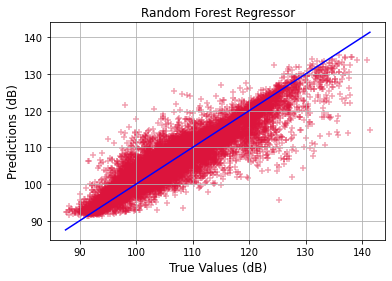

In [10]:
print(type(predicted_test))
#df=pd.Dataframe()
#df['True_value'] = pd.Series(y_test)
df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.grid()
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.4)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Random Forest Regressor', fontsize=12)
plt.savefig('Pathloss_predicted_vs_actual_RF_test_data.eps', format='eps')

In [71]:
best_model_rf = grid_rf.best_estimator_
print(best_model_rf.get_params())
predicted_train = best_model_rf.predict(X_train)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("Train error is: ",train_error, " dB.")
y_predict = best_model_rf.predict(X_test)
test_error_svr = mean_squared_error(y_test,y_predict,squared = False)
print("RMS Error on Test Data is:",test_error_svr,"dB.")

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train error is:  1.1415462351243388  dB.
RMS Error on Test Data is: 1.9759371703595057 dB.


In [31]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set = evaluation_set.drop(["Path_loss_average"],axis=1).values
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_rf'] = 0

In [32]:
# Evaluate on Evaluation Dataset
predicted_eval_set = best_model_rf.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("R^2 score: ",best_model_rf.score(X_eval_set, y_eval_set), "dB.")
print("RMSE: ",evaluation_error, "dB.")
print("MAE: ",mean_absolute_error(y_eval_set, predicted_eval_set), "dB.")
print("MAPE: ",mean_absolute_percentage_error(y_eval_set, predicted_eval_set), "dB.")

R^2 score:  0.5889971567399037 dB.
RMSE:  3.2715907506342328 dB.
MAE:  2.0704301424188474 dB.
MAPE:  0.019348935831022866 dB.


In [33]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_rf'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("RF_validation_set_04_tx45_scaled.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


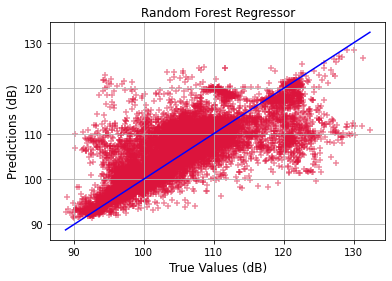

In [37]:
#Now plot the results
df4 = pd.read_excel('RF_validation_set_02_tx25_scaled.xlsx')
df5 = pd.read_excel('RF_validation_set_02_tx45_scaled.xlsx')
df6 = pd.read_excel('RF_validation_set_03_tx25_scaled.xlsx')
df7 = pd.read_excel('RF_validation_set_03_tx35_scaled.xlsx')
df8 = pd.read_excel('RF_validation_set_03_tx45_scaled.xlsx')
df9 = pd.read_excel('RF_validation_set_04_tx25_scaled.xlsx')
df10 = pd.read_excel('RF_validation_set_04_tx45_scaled.xlsx')
df_concat = pd.concat([df4,df5,df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_rf"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.5)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Random Forest Regressor', fontsize=12)
plt.grid()
plt.savefig('Pathloss_predicted_vs_actual_RF_scaled.eps', format='eps')

### 2. Support Vector Machines

In [7]:
from sklearn.svm import SVR
X = pathloss.drop(["Path_loss"],axis=1).values
y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('svr',SVR())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svr_scaled = pipeline.fit(X_train,y_train)
y_predict = svr_scaled.predict(X_test)
print("R-Squared score on Scaled Data is:",svr_scaled.score(X_test,y_test))
test_error_svr = mean_squared_error(y_test,y_predict,squared = False)
print("RMS Error on Test Data is:",test_error_svr,"dB.")

R-Squared score on Scaled Data is: 0.5908038768409467
RMS Error on Test Data is: 5.061195213893517 dB.


In [8]:
predicted_train = svr_scaled.predict(X_train)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("train error is: ",train_error, " dB.")

train error is:  5.116932416847572  dB.


In [37]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss'
]]
X_eval_set = evaluation_set.drop(["Path_loss"],axis=1).values
y_eval_set = evaluation_set["Path_loss"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss'
]].copy()
evaluation_results['predicted_svr'] = 0

In [38]:
# Evaluate on Evaluation Dataset
predicted_eval_set = svr_scaled.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("Prediction Error on Evaluation Dataset is:",evaluation_error, "dB.")

Prediction Error on Evaluation Dataset is: 4.858335663344313 dB.


In [39]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_svr'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("support_vector_regression_validation_set_04_tx45.xlsx",index=False)

### 3. Support Vector Machines Hyperparameters Tuning 

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#X = pathloss.drop(["Path_loss"],axis=1).values
#y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('svr',SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__epsilon':[0.1,5.0,10.0],
              'svr__C':[1,30],
              'svr__kernel':['linear']}
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svm_cv = GridSearchCV(pipeline,param_grid = parameters,cv=2, verbose=4)
svm_cv.fit(X_train,y_train)
print("Best score after hyper-parameter tuning is:",svm_cv.best_score_)
print("Best Parameters after hyper-parameter tuning are:",svm_cv.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END svr__C=1, svr__epsilon=0.1, svr__kernel=linear;, score=0.465 total time= 6.7min
[CV 2/2] END svr__C=1, svr__epsilon=0.1, svr__kernel=linear;, score=0.465 total time= 7.0min
[CV 1/2] END svr__C=1, svr__epsilon=5.0, svr__kernel=linear;, score=0.502 total time=  51.7s
[CV 2/2] END svr__C=1, svr__epsilon=5.0, svr__kernel=linear;, score=0.503 total time=  50.0s
[CV 1/2] END svr__C=1, svr__epsilon=10.0, svr__kernel=linear;, score=0.045 total time=   3.3s
[CV 2/2] END svr__C=1, svr__epsilon=10.0, svr__kernel=linear;, score=0.045 total time=   3.2s
[CV 1/2] END svr__C=30, svr__epsilon=0.1, svr__kernel=linear;, score=0.478 total time=45.2min
[CV 2/2] END svr__C=30, svr__epsilon=0.1, svr__kernel=linear;, score=0.476 total time=47.2min
[CV 1/2] END svr__C=30, svr__epsilon=5.0, svr__kernel=linear;, score=0.509 total time= 3.4min
[CV 2/2] END svr__C=30, svr__epsilon=5.0, svr__kernel=linear;, score=0.511 total time= 3.4min
[CV 

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#X = pathloss.drop(["Path_loss"],axis=1).values
#y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('svr',SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__epsilon':[1.0,5.0],
              'svr__C':[10,30],
              'svr__kernel':['rbf']}
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svm_cv = GridSearchCV(pipeline,param_grid = parameters,cv=2, verbose=4)
svm_cv.fit(X_train,y_train)
print("Best score after hyper-parameter tuning is:",svm_cv.best_score_)
print("Best Parameters after hyper-parameter tuning are:",svm_cv.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END svr__C=10, svr__epsilon=1.0, svr__kernel=rbf;, score=0.723 total time= 6.8min
[CV 2/2] END svr__C=10, svr__epsilon=1.0, svr__kernel=rbf;, score=0.723 total time= 6.9min
[CV 1/2] END svr__C=10, svr__epsilon=5.0, svr__kernel=rbf;, score=0.642 total time=  58.4s
[CV 2/2] END svr__C=10, svr__epsilon=5.0, svr__kernel=rbf;, score=0.652 total time=  58.4s
[CV 1/2] END svr__C=30, svr__epsilon=1.0, svr__kernel=rbf;, score=0.731 total time= 9.6min
[CV 2/2] END svr__C=30, svr__epsilon=1.0, svr__kernel=rbf;, score=0.732 total time= 9.8min
[CV 1/2] END svr__C=30, svr__epsilon=5.0, svr__kernel=rbf;, score=0.653 total time= 1.0min
[CV 2/2] END svr__C=30, svr__epsilon=5.0, svr__kernel=rbf;, score=0.662 total time= 1.0min
Best score after hyper-parameter tuning is: 0.7314987234958465
Best Parameters after hyper-parameter tuning are: {'svr__C': 30, 'svr__epsilon': 1.0, 'svr__kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#X = pathloss.drop(["Path_loss"],axis=1).values
#y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('svr',SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__epsilon':[0.5],
              'svr__C':[30,100],
              'svr__kernel':['rbf']}
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svm_cv = GridSearchCV(pipeline,param_grid = parameters,cv=2, verbose=4)
svm_cv.fit(X_train,y_train)
print("Best score after hyper-parameter tuning is:",svm_cv.best_score_)
print("Best Parameters after hyper-parameter tuning are:",svm_cv.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END svr__C=30, svr__epsilon=0.5, svr__kernel=rbf;, score=0.727 total time=18.2min
[CV 2/2] END svr__C=30, svr__epsilon=0.5, svr__kernel=rbf;, score=0.728 total time=17.3min
[CV 1/2] END svr__C=100, svr__epsilon=0.5, svr__kernel=rbf;, score=0.735 total time=37.1min
[CV 2/2] END svr__C=100, svr__epsilon=0.5, svr__kernel=rbf;, score=0.738 total time=38.0min


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#X = pathloss.drop(["Path_loss"],axis=1).values
#y = pathloss["Path_loss"].values
steps = [('scaler', StandardScaler()), ('svr',SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__epsilon':[0.5,1.0,1.5,2.0,2.5],
              'svr__C':[100,500,1000],
              'svr__kernel':['rbf']}
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svm_cv = GridSearchCV(pipeline,param_grid = parameters,cv=2, verbose=4)
svm_cv.fit(X_train,y_train)
print("Best score after hyper-parameter tuning is:",svm_cv.best_score_)
print("Best Parameters after hyper-parameter tuning are:",svm_cv.best_params_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2] END svr__C=100, svr__epsilon=0.5, svr__kernel=rbf;, score=0.735 total time=38.3min
[CV 2/2] END svr__C=100, svr__epsilon=0.5, svr__kernel=rbf;, score=0.738 total time=38.6min
[CV 1/2] END svr__C=100, svr__epsilon=1.0, svr__kernel=rbf;, score=0.739 total time=27.4min
[CV 2/2] END svr__C=100, svr__epsilon=1.0, svr__kernel=rbf;, score=0.741 total time=28.1min
[CV 1/2] END svr__C=100, svr__epsilon=1.5, svr__kernel=rbf;, score=0.742 total time=18.5min
[CV 2/2] END svr__C=100, svr__epsilon=1.5, svr__kernel=rbf;, score=0.743 total time=18.0min
[CV 1/2] END svr__C=100, svr__epsilon=2.0, svr__kernel=rbf;, score=0.743 total time=13.3min
[CV 2/2] END svr__C=100, svr__epsilon=2.0, svr__kernel=rbf;, score=0.743 total time=13.2min
[CV 1/2] END svr__C=100, svr__epsilon=2.5, svr__kernel=rbf;, score=0.741 total time= 9.6min
[CV 2/2] END svr__C=100, svr__epsilon=2.5, svr__kernel=rbf;, score=0.740 total time= 9.7min
[CV 1/2] END svr__C

In [4]:
best_model_svr = svm_cv.best_estimator_
predicted_train = best_model_svr.predict(X_train)
train_error = mean_squared_error(y_train,predicted_train,squared = False)
print("Train error is: ",train_error, " dB.")
y_predict = best_model_svr.predict(X_test)
test_error_svr = mean_squared_error(y_test,y_predict,squared = False)
print("RMS Error on Test Data is:",test_error_svr,"dB.")

Train error is:  6.596261054886454  dB.
RMS Error on Test Data is: 6.585425949007371 dB.


In [5]:
svr_basic = SVR()
parameters = {'gamma':[0.001],
              'kernel':['rbf']}
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle = True)
svm_cv_mod = GridSearchCV(svr_basic,param_grid = parameters,cv=2,n_jobs=-1, verbose=4)
svm_cv_mod.fit(X_train,y_train)
print("Best score after hyper-parameter tuning is:",svm_cv_mod.best_score_)
print("Best Parameters after hyper-parameter tuning are:",svm_cv_mod.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best score after hyper-parameter tuning is: 0.5551579792310333
Best Parameters after hyper-parameter tuning are: {'gamma': 0.001, 'kernel': 'rbf'}


In [7]:
from datetime import datetime
time_now = datetime.now().strftime("%H:%M:%S")

print("The current date and time is", time_now, datetime.now())

The current date and time is 20:36:02 2023-05-14 20:36:02.546112


In [8]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_01_tx25.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss'
]]
X_eval_set = evaluation_set.drop(["Path_loss"],axis=1).values
y_eval_set = evaluation_set["Path_loss"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss'
]].copy()
evaluation_results['predicted_svr'] = 0

In [9]:
# Evaluate on Evaluation Dataset
print("The time before prediction is", datetime.now())
predicted_eval_set = svm_cv_mod.predict(X_eval_set)
print("The time after prediction is", datetime.now())
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("Prediction Error on Evaluation Dataset is:",evaluation_error, "dB.")

The time before prediction is 2023-05-14 20:42:11.463895
The time after prediction is 2023-05-14 20:43:08.542684
Prediction Error on Evaluation Dataset is: 10.289022411381795 dB.


In [ ]:
print(svm_cv_mod.score(X_test,y_test))

In [ ]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_svr'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("grid_cv_support_vector_regression_validation_set_01_tx25.xlsx",index=False)

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
print(svr.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [1,30,100],
               'epsilon': [0.1],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 3, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-13 11:42:16.016141
The current date and time before Fitting  2023-07-13 11:42:16.017142
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END C=1, epsilon=0.1, kernel=rbf;, score=(train=0.705, test=0.697) total time=12.5min
[CV 2/3] END C=1, epsilon=0.1, kernel=rbf;, score=(train=0.703, test=0.705) total time=12.3min
[CV 3/3] END C=1, epsilon=0.1, kernel=rbf;, score=(train=0.704, test=0.700) total time=12.3min
[CV 1/3] END C=30, epsilon=0.1, kernel=rbf;, score=(train=0.754, test=0.745) total time=31.1min


In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30,100],
               'epsilon': [0.1],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-14 10:42:35.104707
The current date and time before Fitting  2023-07-14 10:42:35.178908
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END C=30, epsilon=0.1, kernel=rbf;, score=(train=0.752, test=0.741) total time=17.6min
[CV 2/2] END C=30, epsilon=0.1, kernel=rbf;, score=(train=0.751, test=0.743) total time=18.2min
[CV 1/2] END C=100, epsilon=0.1, kernel=rbf;, score=(train=0.770, test=0.754) total time=43.8min
[CV 2/2] END C=100, epsilon=0.1, kernel=rbf;, score=(train=0.769, test=0.755) total time=43.4min


In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [200,300,400,500],
               'epsilon': [0.1],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-14 20:26:54.823466
The current date and time before Fitting  2023-07-14 20:26:54.827628
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=200, epsilon=0.1, kernel=rbf;, score=(train=0.780, test=0.760) total time=121.7min
[CV 2/2] END C=200, epsilon=0.1, kernel=rbf;, score=(train=0.779, test=0.762) total time=95.3min


In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [300,400,500],
               'epsilon': [0.1],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, n_jobs = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-15 10:53:29.415857
The current date and time before Fitting  2023-07-15 10:53:29.431815
Fitting 2 folds for each of 3 candidates, totalling 6 fits


In [5]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [1],
               'epsilon': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-15 15:10:13.674839
The current date and time before Fitting  2023-07-15 15:10:13.674839
Fitting 2 folds for each of 11 candidates, totalling 22 fits
[CV 1/2] END C=1, epsilon=0.1, kernel=rbf;, score=(train=0.703, test=0.695) total time=10.1min
[CV 2/2] END C=1, epsilon=0.1, kernel=rbf;, score=(train=0.697, test=0.697) total time=10.1min
[CV 1/2] END C=1, epsilon=0.5, kernel=rbf;, score=(train=0.703, test=0.696) total time= 7.8min
[CV 2/2] END C=1, epsilon=0.5, kernel=rbf;, score=(train=0.698, test=0.698) total time= 7.8min
[CV 1/2] END C=1, epsilon=1.0, kernel=rbf;, score=(train=0.705, test=0.697) total time= 5.9min
[CV 2/2] END C=1, epsilon=1.0, kernel=rbf;, score=(train=0.700, test=0.700) total time= 6.1min
[CV 1/2] END C=1, epsilon=1.5, kernel=rbf;, score=(train=0.707, test=0.699) total time= 4.8min
[CV 2/2] END C=1, epsilon=1.5, kernel=rbf;, score=(train=0.701, test=0.702) total time= 4.9min
[CV 1/2] END C=1, epsilon=2.

In [6]:
cv_results_df = pd.DataFrame(grid_svr.cv_results_)
cv_results_df.to_excel("SVM_initial_hyperparameter_tuning_gridsearch_epsilon.xlsx",index=False)
print(cv_results_df.head(2))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     216.805240      0.542636       388.299474        0.937057       1   
1     169.346575      0.415390       298.356006        0.995562       1   

  param_epsilon param_kernel                                     params  \
0           0.1          rbf  {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}   
1           0.5          rbf  {'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.695357           0.697383         0.696370        0.001013   
1           0.695968           0.698335         0.697151        0.001184   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0                7            0.702614            0.696855          0.699734   
1                6            0.703319            0.697755          0.700537   

   std_train_score  
0         0.002880  
1         0.002782  


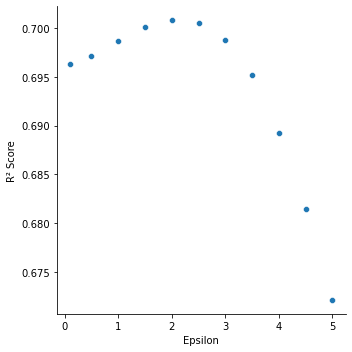

In [7]:
#sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_epsilon",y="mean_test_score", kind="scatter")
#g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Epsilon", ylabel="R\u00b2 Score")

In [9]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [0.1,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 7.5, 10.0],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-15 18:43:37.307316
The current date and time before Fitting  2023-07-15 18:43:37.307316
Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV 1/2] END C=30, epsilon=0.1, kernel=rbf;, score=(train=0.752, test=0.741) total time=30.3min
[CV 2/2] END C=30, epsilon=0.1, kernel=rbf;, score=(train=0.751, test=0.743) total time=17.8min
[CV 1/2] END C=30, epsilon=0.5, kernel=rbf;, score=(train=0.753, test=0.742) total time=13.5min
[CV 2/2] END C=30, epsilon=0.5, kernel=rbf;, score=(train=0.752, test=0.743) total time=13.0min
[CV 1/2] END C=30, epsilon=1.0, kernel=rbf;, score=(train=0.755, test=0.744) total time= 9.6min
[CV 2/2] END C=30, epsilon=1.0, kernel=rbf;, score=(train=0.754, test=0.745) total time= 9.7min
[CV 1/2] END C=30, epsilon=1.5, kernel=rbf;, score=(train=0.757, test=0.746) total time= 6.9min
[CV 2/2] END C=30, epsilon=1.5, kernel=rbf;, score=(train=0.756, test=0.748) total time= 7.0min
[CV 1/2] END C=30, e

In [10]:
cv_results_df = pd.DataFrame(grid_svr.cv_results_)
cv_results_df.to_excel("SVM_initial_hyperparameter_tuning_gridsearch_epsilon.xlsx",index=False)
print(cv_results_df.head(2))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0    1060.727746    374.610590       380.578290        0.075640      30   
1     502.679459     14.314867       290.414537        0.094395      30   

  param_epsilon param_kernel                                      params  \
0           0.1          rbf  {'C': 30, 'epsilon': 0.1, 'kernel': 'rbf'}   
1           0.5          rbf  {'C': 30, 'epsilon': 0.5, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.741121           0.742592         0.741857        0.000736   
1           0.742003           0.743198         0.742601        0.000598   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0                8            0.752247            0.751148          0.751698   
1                6            0.753288            0.751895          0.752592   

   std_train_score  
0         0.000549  
1         0.000696  


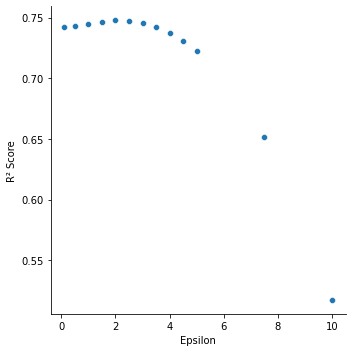

In [11]:
#sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_epsilon",y="mean_test_score", kind="scatter")
#g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Epsilon", ylabel="R\u00b2 Score")

In [6]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [2.0],
               'gamma': [0.5, 5.0, 50.0, 500.0],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-17 11:40:50.422358
The current date and time before Fitting  2023-07-17 11:40:50.432330
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END C=30, epsilon=2.0, gamma=0.5, kernel=rbf;, score=(train=0.879, test=0.822) total time=21.4min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.5, kernel=rbf;, score=(train=0.880, test=0.821) total time=21.6min
[CV 1/2] END C=30, epsilon=2.0, gamma=5.0, kernel=rbf;, score=(train=0.949, test=0.759) total time=19.7min
[CV 2/2] END C=30, epsilon=2.0, gamma=5.0, kernel=rbf;, score=(train=0.948, test=0.760) total time=19.9min
[CV 1/2] END C=30, epsilon=2.0, gamma=50.0, kernel=rbf;, score=(train=0.934, test=0.182) total time=32.4min
[CV 2/2] END C=30, epsilon=2.0, gamma=50.0, kernel=rbf;, score=(train=0.934, test=0.182) total time=32.8min
[CV 1/2] END C=30, epsilon=2.0, gamma=500.0, kernel=rbf;, score=(train=0.933, test=-0.003) total time=34.4min
[CV 2/2] END C=30, epsilon=2.0, gamm

In [7]:
cv_results_df = pd.DataFrame(grid_svr.cv_results_)
cv_results_df.to_excel("SVM_initial_hyperparameter_tuning_gridsearch_gamma.xlsx",index=False)
print(cv_results_df.head(2))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0    1160.924839      6.726138       127.327021        0.983133      30   
1    1012.404106      6.765825       178.262784        1.106130      30   

  param_epsilon param_gamma param_kernel  \
0           2.0         0.5          rbf   
1           2.0         5.0          rbf   

                                              params  split0_test_score  \
0  {'C': 30, 'epsilon': 2.0, 'gamma': 0.5, 'kerne...           0.822309   
1  {'C': 30, 'epsilon': 2.0, 'gamma': 5.0, 'kerne...           0.758792   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.821186         0.821747        0.000562                1   
1           0.760191         0.759491        0.000700                2   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0             0.87908            0.879829          0.879455         0.000374  
1             0.94857            0

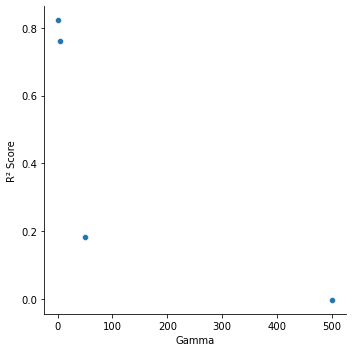

In [10]:
#sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_gamma",y="mean_test_score", kind="scatter")
#g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Gamma", ylabel="R\u00b2 Score")

In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [2.0],
               'gamma': [0.01, 0.1, 0.2, 0.3, 0.4],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-17 21:11:46.688838
The current date and time before Fitting  2023-07-17 21:11:46.696839
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END C=30, epsilon=2.0, gamma=0.01, kernel=rbf;, score=(train=0.672, test=0.666) total time=11.4min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.01, kernel=rbf;, score=(train=0.666, test=0.669) total time=10.4min
[CV 1/2] END C=30, epsilon=2.0, gamma=0.1, kernel=rbf;, score=(train=0.773, test=0.758) total time=18.1min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.1, kernel=rbf;, score=(train=0.772, test=0.760) total time=21.3min
[CV 1/2] END C=30, epsilon=2.0, gamma=0.2, kernel=rbf;, score=(train=0.815, test=0.788) total time=19.1min


In [5]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [2.0],
               'gamma': [0.3, 0.4, 0.6, 0.7, 1.0],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-18 09:28:50.309458
The current date and time before Fitting  2023-07-18 09:28:50.310456
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END C=30, epsilon=2.0, gamma=0.3, kernel=rbf;, score=(train=0.843, test=0.805) total time=17.7min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.3, kernel=rbf;, score=(train=0.844, test=0.804) total time=18.9min
[CV 1/2] END C=30, epsilon=2.0, gamma=0.4, kernel=rbf;, score=(train=0.863, test=0.815) total time=19.9min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.4, kernel=rbf;, score=(train=0.864, test=0.814) total time=21.7min
[CV 1/2] END C=30, epsilon=2.0, gamma=0.6, kernel=rbf;, score=(train=0.891, test=0.827) total time=23.5min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.6, kernel=rbf;, score=(train=0.892, test=0.827) total time=23.0min
[CV 1/2] END C=30, epsilon=2.0, gamma=0.7, kernel=rbf;, score=(train=0.901, test=0.830) total time=22.2min
[CV 2/2] END C=30, epsilon=2.0, gamma=0.

In [ ]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [2.0],
               'gamma': [1.1, 2.0],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-22 10:27:31.240651
The current date and time before Fitting  2023-07-22 10:27:31.258601
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END C=30, epsilon=2.0, gamma=1.1, kernel=rbf;, score=(train=0.924, test=0.835) total time=38.3min
[CV 2/2] END C=30, epsilon=2.0, gamma=1.1, kernel=rbf;, score=(train=0.925, test=0.837) total time=36.2min
[CV 1/2] END C=30, epsilon=2.0, gamma=2.0, kernel=rbf;, score=(train=0.944, test=0.828) total time=34.5min
[CV 2/2] END C=30, epsilon=2.0, gamma=2.0, kernel=rbf;, score=(train=0.944, test=0.830) total time=34.1min


In [5]:
from datetime import datetime
print("The current date and time before running gridsearch is", datetime.now())
params_svr = { 'C': [30],
               'epsilon': [2.0],
               'gamma': [1.2, 1.3, 1.4, 1.5, 1.6],
               'kernel': ['rbf']}

grid_svr = GridSearchCV(estimator = svr, param_grid = params_svr, cv = 2, scoring='r2',refit=True,return_train_score=True, verbose=4 )
print("The current date and time before Fitting ", datetime.now())
grid_svr.fit(X_train_scaled, y_train)
print("The current date and time after Fitting ", datetime.now())
best_hyperparams = grid_svr.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

The current date and time before running gridsearch is 2023-07-22 16:02:27.178314
The current date and time before Fitting  2023-07-22 16:02:27.178314
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END C=30, epsilon=2.0, gamma=1.2, kernel=rbf;, score=(train=0.928, test=0.835) total time=37.5min
[CV 2/2] END C=30, epsilon=2.0, gamma=1.2, kernel=rbf;, score=(train=0.929, test=0.837) total time=36.5min
[CV 1/2] END C=30, epsilon=2.0, gamma=1.3, kernel=rbf;, score=(train=0.931, test=0.835) total time=42.0min
[CV 2/2] END C=30, epsilon=2.0, gamma=1.3, kernel=rbf;, score=(train=0.932, test=0.837) total time=35.5min
[CV 1/2] END C=30, epsilon=2.0, gamma=1.4, kernel=rbf;, score=(train=0.934, test=0.835) total time=35.6min
[CV 2/2] END C=30, epsilon=2.0, gamma=1.4, kernel=rbf;, score=(train=0.935, test=0.836) total time=35.0min
[CV 1/2] END C=30, epsilon=2.0, gamma=1.5, kernel=rbf;, score=(train=0.936, test=0.834) total time=35.4min
[CV 2/2] END C=30, epsilon=2.0, gamma=1.

In [6]:
cv_results_df = pd.DataFrame(grid_svr.cv_results_)
cv_results_df.to_excel("SVM_initial_hyperparameter_tuning_gridsearch_gammabest.xlsx",index=False)
print(cv_results_df.head(5))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0    2095.354273     28.436211       124.447767        0.698424      30   
1    2201.104342    192.662829       124.509762        0.354858      30   
2    1991.710845     17.659049       125.759223        0.589567      30   
3    2009.232936     12.352403       127.202582        0.552315      30   
4    3210.291939    821.574992       249.487740      120.612887      30   

  param_epsilon param_gamma param_kernel  \
0           2.0         1.2          rbf   
1           2.0         1.3          rbf   
2           2.0         1.4          rbf   
3           2.0         1.5          rbf   
4           2.0         1.6          rbf   

                                              params  split0_test_score  \
0  {'C': 30, 'epsilon': 2.0, 'gamma': 1.2, 'kerne...           0.835457   
1  {'C': 30, 'epsilon': 2.0, 'gamma': 1.3, 'kerne...           0.835214   
2  {'C': 30, 'epsilon': 2.0, 'gamma': 1.4, 'kerne...       

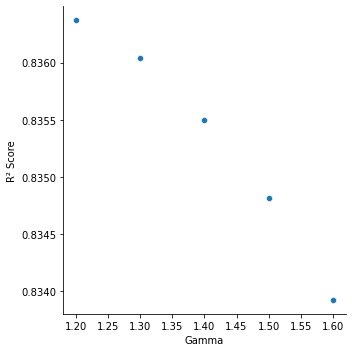

In [7]:
#sns.set_style("white")
g = sns.relplot(data=cv_results_df,x="param_gamma",y="mean_test_score", kind="scatter")
#g.fig.suptitle("K-Nearest Neighbors", y=1.03)
g.set(xlabel="Gamma", ylabel="R\u00b2 Score")

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0     971.432186     35.616135       126.399254        2.193445       30   
1    1122.149057     54.417117       124.533560        0.143515       30   
2    1160.924839      6.726138       127.327021        0.983133       30   
3     971.432186     35.616135       126.399254        2.193445       30   
4    1122.149057     54.417117       124.533560        0.143515       30   
5    1160.924839      6.726138       127.327021        0.983133       30   
6    1272.251229     11.424235       124.169337        2.150770       30   
7    1237.761574     27.547740       122.210577        0.177305       30   
8    2012.592832     13.006166       123.127418        1.014162       30   
9    2106.916219     64.226115       129.005198        1.517272       30   

   param_epsilon  param_gamma param_kernel  \
0              2         0.01          rbf   
1              2         0.10          rbf   
2              2         

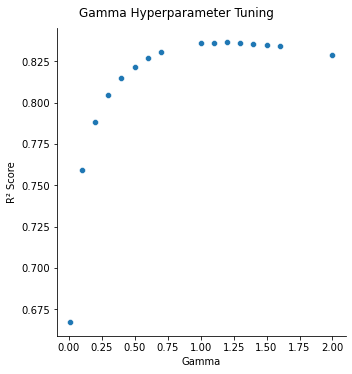

In [11]:
cv_results_df = pd.read_excel('SVM_initial_hyperparameter_tuning_gridsearch_gammafinal.xlsx')
print(cv_results_df.head(10))
g = sns.relplot(data=cv_results_df,x="param_gamma",y="mean_test_score", kind="scatter")
g.fig.suptitle("Gamma Hyperparameter Tuning", y=1.03)
g.set(xlabel="Gamma", ylabel="R\u00b2 Score")

In [12]:
#Now doing the train, test evaluations for the tuned SVR model
best_model_svr = SVR(C=30,epsilon=2,gamma=1.2, kernel='rbf')
best_model_svr.fit(X_train_scaled, y_train)
predicted_test = best_model_svr.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = best_model_svr.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

Test RMSE error is:  2.5371076032144106  dB.
R-Squared error on test dataset is: 0.869402250055568
Test MAPE error is: 0.01598306748614163
Test MAE error is: 1.6865155823947786


   True_values  Predicted_values
0     98.42698         99.203420
1    107.93980        104.905811
2     99.48324         99.067801
3    135.93880        136.563814
4    100.19494         99.830428


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


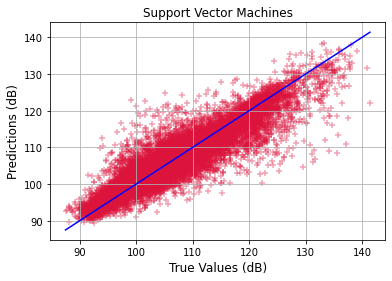

In [13]:
# Print Test Data Results for SVR
#df=pd.Dataframe()
#df['True_value'] = pd.Series(y_test)
df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.grid()
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.4)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Support Vector Machines', fontsize=12)
plt.savefig('Pathloss_predicted_vs_actual_SVM_test_data.eps', format='eps')

In [14]:
# Save predictions vs True values for Test Data for SVM
df.to_excel("SVM_true_vs_predictions_test_data.xlsx",index=False)

In [35]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set2 = evaluation_set.drop(["Path_loss_average"],axis=1).values
X_eval_set = scaler.transform(X_eval_set2)
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_svr'] = 0

In [36]:
# Evaluate on Evaluation Dataset
predicted_eval_set = best_model_svr.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("R^2 score: ",best_model_svr.score(X_eval_set, y_eval_set), "dB.")
print("RMSE: ",evaluation_error, "dB.")
print("MAE: ",mean_absolute_error(y_eval_set, predicted_eval_set), "dB.")
print("MAPE: ",mean_absolute_percentage_error(y_eval_set, predicted_eval_set), "dB.")

R^2 score:  0.5658227867671367 dB.
RMSE:  3.3625602285553042 dB.
MAE:  2.360395174276927 dB.
MAPE:  0.022251284319621298 dB.


In [37]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_svr'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("SVR_validation_set_04_tx45_final.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


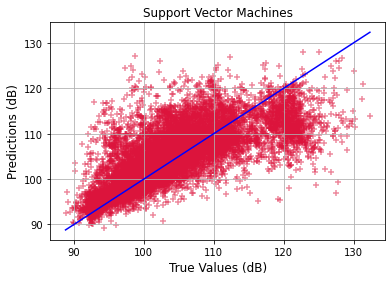

In [38]:
#Now plot the results
df4 = pd.read_excel('SVR_validation_set_02_tx25_final.xlsx')
df5 = pd.read_excel('SVR_validation_set_02_tx45_final.xlsx')
df6 = pd.read_excel('SVR_validation_set_03_tx25_final.xlsx')
df7 = pd.read_excel('SVR_validation_set_03_tx35_final.xlsx')
df8 = pd.read_excel('SVR_validation_set_03_tx45_final.xlsx')
df9 = pd.read_excel('SVR_validation_set_04_tx25_final.xlsx')
df10 = pd.read_excel('SVR_validation_set_04_tx45_final.xlsx')
df_concat = pd.concat([df4,df5,df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_svr"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.5)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('Support Vector Machines', fontsize=12)
plt.grid()
plt.savefig('Pathloss_predicted_vs_actual_SVR_validation_data.eps', format='eps')

# 5. XGBoost

In [ ]:
#Hyperparameters Tuning
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
gbm=xgb.XGBRegressor()
gbm_param_grid = {
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
    'subsample':[0.1,0.5, 1.0],
    'learning_rate':[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree':[0.1, 0.5, ],
    'n_estimators': [5,10,50,100,500,1000],
    'max_depth': [2,5,7,10]
}
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="neg_mean_squared_error", cv=4, verbose=4)
grid_mse.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_mse.best_params_)

Fitting 4 folds for each of 1440 candidates, totalling 5760 fits
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.1;, score=-9729.687 total time=   0.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.1;, score=-9712.092 total time=   0.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.1;, score=-9716.457 total time=   0.0s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.1;, score=-9736.709 total time=   0.0s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.5;, score=-9729.120 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.5;, score=-9711.474 total time=   0.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=5, subsample=0.5;, score=-9716.057 total tim

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.1;, score=-27.070 total time=  10.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.1;, score=-26.140 total time=  10.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.1;, score=-26.350 total time=  10.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.1;, score=-27.740 total time=  10.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5;, score=-26.982 total time=  16.3s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5;, score=-26.074 total time=  16.7s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5;, score=-26.218 total time=  16.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.1;, score=-27.711 total time=   7.9s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.1;, score=-28.013 total time=   7.7s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.1;, score=-29.662 total time=   8.0s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-28.541 total time=  13.3s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-27.420 total time=  13.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-27.653 total time=  13.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-29.307 total time=  13.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, 

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.1;, score=-1470.267 total time=   1.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.1;, score=-1480.201 total time=   1.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5;, score=-1474.960 total time=   2.3s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5;, score=-1465.635 total time=   2.3s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5;, score=-1468.976 total time=   2.3s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.5;, score=-1478.551 total time=   2.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0;, score=-1475.509 total time=   2.1s
[CV 2/4] END colsample_bytree=0.1, learni

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.1;, score=-3970.465 total time=   0.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.5;, score=-3963.702 total time=   1.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.5;, score=-3950.301 total time=   1.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.5;, score=-3954.580 total time=   1.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.5;, score=-3969.084 total time=   1.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=1.0;, score=-3963.175 total time=   1.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=1.0;, score=-3949.895 total time=   1.2s
[CV 3/4] END colsample_bytree=0.1, learni

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.5;, score=-1340.898 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.5;, score=-1331.904 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.5;, score=-1335.333 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=0.5;, score=-1343.638 total time=   0.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=1.0;, score=-1340.092 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=1.0;, score=-1331.671 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=2, n_estimators=10, subsample=1.0;, score=-1335.141 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, m

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=0.5;, score=-3768.296 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=0.5;, score=-3782.261 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=1.0;, score=-3774.844 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=1.0;, score=-3761.844 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=1.0;, score=-3766.763 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=5, subsample=1.0;, score=-3779.546 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=10, subsample=0.1;, score=-1342.353 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_dep

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1.0;, score=-23.165 total time=  28.3s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1.0;, score=-22.336 total time=  28.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1.0;, score=-22.264 total time=  28.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=1.0;, score=-23.541 total time=  28.8s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=5, subsample=0.1;, score=-3779.740 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=5, subsample=0.1;, score=-3766.924 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=5, subsample=0.1;, score=-3770.232 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0;, score=-22.980 total time=  18.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=500, subsample=1.0;, score=-24.190 total time=  18.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.1;, score=-24.414 total time=  20.9s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.1;, score=-23.725 total time=  20.8s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.1;, score=-23.435 total time=  20.9s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.1;, score=-24.863 total time=  23.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=7, n_estimators=1000, subsample=0.5;, score=-23.402 total time=  36.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0;, score=-26.592 total time=   4.8s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.1;, score=-25.388 total time=  13.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.1;, score=-24.565 total time=  13.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.1;, score=-24.276 total time=  13.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.1;, score=-25.724 total time=  13.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5;, score=-24.153 total time=  23.8s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5;, score=-23.389 total time=  24.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.1, m

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.1;, score=-25.377 total time=   1.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.1;, score=-24.499 total time=   1.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.1;, score=-24.607 total time=   1.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.1;, score=-25.753 total time=   1.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.5;, score=-25.266 total time=   1.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.5;, score=-24.387 total time=   1.6s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.5;, score=-24.382 total time=   1.7s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_dept

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.1;, score=-25.111 total time=   0.9s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.1;, score=-26.298 total time=   0.9s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.5;, score=-25.486 total time=   1.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.5;, score=-24.625 total time=   1.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.5;, score=-24.619 total time=   1.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.5;, score=-25.931 total time=   1.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0;, score=-26.269 total time=   1.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=5, n_

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=0.5;, score=-156.190 total time=   0.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=0.5;, score=-152.443 total time=   0.2s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=0.5;, score=-153.954 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=0.5;, score=-157.536 total time=   0.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=1.0;, score=-155.455 total time=   0.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=1.0;, score=-151.894 total time=   0.3s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=7, n_estimators=10, subsample=1.0;, score=-153.380 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_dept

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=0.5;, score=-1183.884 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=0.5;, score=-1192.389 total time=   0.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=1.0;, score=-1187.421 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=1.0;, score=-1179.134 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=1.0;, score=-1182.811 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=5, subsample=1.0;, score=-1190.428 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=10, subsample=0.1;, score=-157.237 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, m

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.5;, score=-25.861 total time=  47.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=1.0;, score=-24.489 total time=  51.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=1.0;, score=-23.809 total time=  51.3s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=1.0;, score=-23.638 total time=  51.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=1.0;, score=-24.797 total time=  51.8s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=5, subsample=0.1;, score=-340.322 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=5, subsample=0.1;, score=-335.121 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, 

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=500, subsample=1.0;, score=-22.455 total time=   6.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=500, subsample=1.0;, score=-22.408 total time=   6.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=500, subsample=1.0;, score=-23.667 total time=   6.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=1000, subsample=0.1;, score=-23.707 total time=  10.9s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=1000, subsample=0.1;, score=-22.795 total time=  10.7s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=1000, subsample=0.1;, score=-22.760 total time=  11.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=2, n_estimators=1000, subsample=0.1;, score=-24.021 total time=  11.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0;, score=-25.010 total time=   2.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.1;, score=-25.690 total time=   8.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.1;, score=-24.920 total time=   8.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.1;, score=-24.962 total time=   8.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.1;, score=-25.996 total time=   8.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5;, score=-23.644 total time=  14.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5;, score=-22.619 total time=  14.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_dept

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.1;, score=-25.219 total time=   2.8s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.1;, score=-25.074 total time=   2.7s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.1;, score=-26.096 total time=   2.7s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.5;, score=-24.329 total time=   4.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.5;, score=-23.432 total time=   4.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.5;, score=-23.462 total time=   4.3s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.5;, score=-24.616 total time=   4.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_dept

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=0.1;, score=-27.185 total time=   1.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=0.5;, score=-25.028 total time=   2.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=0.5;, score=-24.244 total time=   2.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=0.5;, score=-24.208 total time=   2.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=0.5;, score=-25.554 total time=   2.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=1.0;, score=-25.506 total time=   2.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.3, max_depth=10, n_estimators=50, subsample=1.0;, score=-24.501 total time=   2.6s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.3, max_dept

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=0.5;, score=-30.561 total time=   0.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=0.5;, score=-29.645 total time=   0.2s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=0.5;, score=-29.769 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=0.5;, score=-31.115 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=1.0;, score=-29.968 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=1.0;, score=-28.953 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_estimators=10, subsample=1.0;, score=-29.214 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=2, n_

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=0.5;, score=-95.898 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=0.5;, score=-98.846 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=1.0;, score=-98.448 total time=   0.0s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=1.0;, score=-95.641 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=1.0;, score=-96.986 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=5, subsample=1.0;, score=-99.816 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=10, subsample=0.1;, score=-29.219 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estima

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=1000, subsample=1.0;, score=-23.299 total time=  30.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=1000, subsample=1.0;, score=-22.638 total time=  29.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=1000, subsample=1.0;, score=-22.442 total time=  28.8s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=5, n_estimators=1000, subsample=1.0;, score=-23.642 total time=  28.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=5, subsample=0.1;, score=-98.834 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=5, subsample=0.1;, score=-95.540 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=5, subsample=0.1;, score=-96.733 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=500, subsample=1.0;, score=-22.800 total time=  18.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=500, subsample=1.0;, score=-23.888 total time=  19.7s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=1000, subsample=0.1;, score=-33.661 total time=  24.8s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=1000, subsample=0.1;, score=-33.821 total time=  20.9s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=1000, subsample=0.1;, score=-34.100 total time=  20.9s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=1000, subsample=0.1;, score=-34.747 total time=  21.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=7, n_estimators=1000, subsample=0.5;, score=-26.182 total time=  36.3s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.1;, score=-37.187 total time=  13.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.1;, score=-37.389 total time=  14.9s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.1;, score=-37.017 total time=  13.8s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.1;, score=-37.778 total time=  13.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.5;, score=-27.176 total time=  23.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.5;, score=-26.913 total time=  23.6s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.4, max_depth=10, n_estimators=500, subsample=0.5;, score=-26.297 total time=  23.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.4, m

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.1;, score=-23.715 total time=   1.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.1;, score=-24.980 total time=   1.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.5;, score=-24.181 total time=   1.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.5;, score=-23.270 total time=   1.6s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.5;, score=-23.287 total time=   1.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=0.5;, score=-24.481 total time=   1.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=2, n_estimators=100, subsample=1.0;, score=-24.545 total time=   1.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_dept

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=0.5;, score=-24.637 total time=   1.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=0.5;, score=-23.667 total time=   1.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=0.5;, score=-23.725 total time=   1.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=0.5;, score=-24.894 total time=   1.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=1.0;, score=-24.767 total time=   1.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=1.0;, score=-23.736 total time=   1.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_estimators=50, subsample=1.0;, score=-23.950 total time=   1.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=5, n_

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=0.5;, score=-27.147 total time=   0.3s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=0.5;, score=-28.422 total time=   0.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=1.0;, score=-27.382 total time=   0.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=1.0;, score=-26.353 total time=   0.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=1.0;, score=-26.560 total time=   0.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=10, subsample=1.0;, score=-27.812 total time=   0.4s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_estimators=50, subsample=0.1;, score=-27.050 total time=   1.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=7, n_

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=5, subsample=1.0;, score=-41.646 total time=   0.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=5, subsample=1.0;, score=-42.445 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=5, subsample=1.0;, score=-44.322 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=10, subsample=0.1;, score=-28.213 total time=   0.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=10, subsample=0.1;, score=-27.567 total time=   0.2s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=10, subsample=0.1;, score=-27.739 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=10, subsample=0.1;, score=-29.468 total time=   0.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=1

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=1000, subsample=1.0;, score=-25.855 total time=  52.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=1000, subsample=1.0;, score=-27.114 total time=  51.9s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=5, subsample=0.1;, score=-32.565 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=5, subsample=0.1;, score=-31.380 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=5, subsample=0.1;, score=-31.849 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=5, subsample=0.1;, score=-33.100 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=5, subsample=0.5;, score=-32.617 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.1;, score=-25.064 total time=  10.7s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.1;, score=-24.250 total time=  11.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.1;, score=-24.263 total time=  11.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.1;, score=-25.438 total time=  11.0s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.5;, score=-23.233 total time=  17.0s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.5;, score=-22.465 total time=  16.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=2, n_estimators=1000, subsample=0.5;, score=-22.439 total time=  16.3s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, m

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.1;, score=-31.818 total time=   8.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.1;, score=-32.152 total time=   8.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.5;, score=-24.688 total time=  14.4s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.5;, score=-24.355 total time=  14.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.5;, score=-24.311 total time=  15.3s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=0.5;, score=-25.579 total time=  14.3s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=5, n_estimators=500, subsample=1.0;, score=-23.637 total time=  14.0s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_dept

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=0.5;, score=-24.730 total time=   3.7s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=0.5;, score=-24.055 total time=   3.8s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=0.5;, score=-24.093 total time=   3.8s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=0.5;, score=-25.189 total time=   3.8s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=1.0;, score=-24.075 total time=   3.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=1.0;, score=-23.267 total time=   3.5s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=7, n_estimators=100, subsample=1.0;, score=-23.282 total time=   3.5s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_dept

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=0.5;, score=-25.273 total time=   2.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=0.5;, score=-26.677 total time=   2.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=1.0;, score=-25.214 total time=   2.7s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=1.0;, score=-24.285 total time=   2.7s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=1.0;, score=-24.277 total time=   2.7s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=50, subsample=1.0;, score=-25.583 total time=   2.7s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.6, max_depth=10, n_estimators=100, subsample=0.1;, score=-35.472 total time=   2.9s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.6, max_dep

[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=10, subsample=1.0;, score=-28.273 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=10, subsample=1.0;, score=-27.359 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=10, subsample=1.0;, score=-27.608 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=10, subsample=1.0;, score=-28.790 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=50, subsample=0.1;, score=-25.101 total time=   0.6s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=50, subsample=0.1;, score=-24.305 total time=   0.6s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_estimators=50, subsample=0.1;, score=-24.287 total time=   0.6s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=2, n_

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=5, subsample=1.0;, score=-31.771 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=5, subsample=1.0;, score=-32.979 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=10, subsample=0.1;, score=-27.388 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=10, subsample=0.1;, score=-26.822 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=10, subsample=0.1;, score=-26.730 total time=   0.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=10, subsample=0.1;, score=-28.105 total time=   0.2s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_estimators=10, subsample=0.5;, score=-27.155 total time=   0.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=5, n_es

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.1;, score=-29.310 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.1;, score=-29.559 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.1;, score=-30.781 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.5;, score=-29.914 total time=   0.1s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.5;, score=-28.741 total time=   0.1s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.5;, score=-29.127 total time=   0.1s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=5, subsample=0.5;, score=-30.363 total time=   0.1s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimat

[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=0.1;, score=-63.108 total time=  21.5s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=0.5;, score=-30.508 total time=  37.2s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=0.5;, score=-30.790 total time=  38.8s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=0.5;, score=-30.635 total time=  38.4s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=0.5;, score=-31.429 total time=  37.6s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=1.0;, score=-26.237 total time=  38.7s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=7, n_estimators=1000, subsample=1.0;, score=-25.577 total time=  40.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, m

[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=0.5;, score=-32.659 total time=  23.7s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=0.5;, score=-32.417 total time=  24.2s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=0.5;, score=-33.969 total time=  24.9s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=1.0;, score=-26.851 total time=  26.5s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=1.0;, score=-26.293 total time=  25.4s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.7, max_depth=10, n_estimators=500, subsample=1.0;, score=-26.132 total time=  25.6s


In [4]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
gbm=xgb.XGBRegressor()
gbm_param_grid = {
    'learning_rate':[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="neg_mean_squared_error", cv=4,refit=True,return_train_score=True, verbose=4)
grid_mse.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_mse.best_params_)

Fitting 4 folds for each of 11 candidates, totalling 44 fits
[CV 1/4] END learning_rate=0.01;, score=(train=-1454.992, test=-1457.630) total time=  13.6s
[CV 2/4] END learning_rate=0.01;, score=(train=-1456.054, test=-1451.097) total time=   5.4s
[CV 3/4] END learning_rate=0.01;, score=(train=-1455.869, test=-1452.877) total time=   5.8s
[CV 4/4] END learning_rate=0.01;, score=(train=-1454.662, test=-1460.892) total time=   7.4s
[CV 1/4] END learning_rate=0.1;, score=(train=-9.580, test=-11.139) total time=   9.2s
[CV 2/4] END learning_rate=0.1;, score=(train=-9.725, test=-10.658) total time=  10.0s
[CV 3/4] END learning_rate=0.1;, score=(train=-9.547, test=-10.346) total time=   9.6s
[CV 4/4] END learning_rate=0.1;, score=(train=-9.536, test=-11.108) total time=   9.3s
[CV 1/4] END learning_rate=0.2;, score=(train=-7.931, test=-10.037) total time=   9.2s
[CV 2/4] END learning_rate=0.2;, score=(train=-7.887, test=-9.563) total time=   9.3s
[CV 3/4] END learning_rate=0.2;, score=(train=

In [5]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
gbm=xgb.XGBRegressor()
gbm_param_grid = {
    'learning_rate':[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_mse2 = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="r2", cv=4,refit=True,return_train_score=True, verbose=4)
grid_mse2.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_mse2.best_params_)

Fitting 4 folds for each of 11 candidates, totalling 44 fits
[CV 1/4] END learning_rate=0.01;, score=(train=-28.554, test=-28.239) total time=   5.5s
[CV 2/4] END learning_rate=0.01;, score=(train=-28.281, test=-29.002) total time=   5.8s
[CV 3/4] END learning_rate=0.01;, score=(train=-28.359, test=-28.784) total time=   5.9s
[CV 4/4] END learning_rate=0.01;, score=(train=-28.686, test=-27.905) total time=   7.1s
[CV 1/4] END learning_rate=0.1;, score=(train=0.805, test=0.777) total time=   7.3s
[CV 2/4] END learning_rate=0.1;, score=(train=0.804, test=0.780) total time=   8.1s
[CV 3/4] END learning_rate=0.1;, score=(train=0.807, test=0.788) total time=   9.2s
[CV 4/4] END learning_rate=0.1;, score=(train=0.805, test=0.780) total time=   9.2s
[CV 1/4] END learning_rate=0.2;, score=(train=0.839, test=0.799) total time=   8.7s
[CV 2/4] END learning_rate=0.2;, score=(train=0.841, test=0.802) total time=   8.3s
[CV 3/4] END learning_rate=0.2;, score=(train=0.835, test=0.801) total time=   

In [6]:
cv_results_df = pd.DataFrame(grid_mse2.cv_results_)
cv_results_df.to_excel("Xgboost_initial_hyperparameter_tuning_gridsearch_learningrate.xlsx",index=False)
print(cv_results_df.head(10))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.143163      0.605954         0.019724        0.006880   
1       8.523903      0.814140         0.037492        0.004960   
2       8.814846      0.303371         0.036538        0.004765   
3       9.268394      0.281784         0.043563        0.002198   
4       8.548790      0.607875         0.032134        0.008337   
5       9.182250      0.081373         0.040634        0.004234   
6       8.702209      0.524517         0.036151        0.008492   
7       9.136104      0.125059         0.041567        0.002080   
8       9.198205      0.097739         0.040904        0.002017   
9       9.297629      0.223950         0.040549        0.002081   

  param_learning_rate                   params  split0_test_score  \
0                0.01  {'learning_rate': 0.01}         -28.239023   
1                 0.1   {'learning_rate': 0.1}           0.776567   
2                 0.2   {'learning_rate': 0.2}         

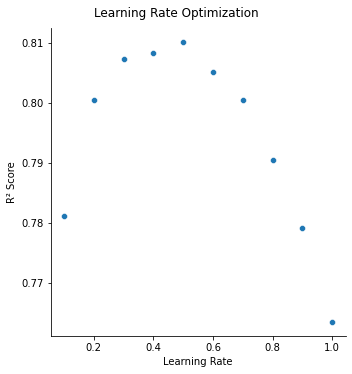

In [8]:
#sns.set_style("white")
cv_results_new = cv_results_df.drop(0)
g = sns.relplot(data=cv_results_new,x="param_learning_rate",y="mean_test_score", kind="scatter")
g.fig.suptitle("Learning Rate Optimization", y=1.03)
g.set(xlabel="Learning Rate", ylabel="R\u00b2 Score")

In [17]:
gbm=xgb.XGBRegressor()
gbm_param_grid = {
    'learning_rate':[0.5],
    'n_estimators': np.arange(50,1050,50),
    'max_depth': np.arange(1,11)
}
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="r2", cv=4,refit=True,return_train_score=True, verbose=4)
grid_mse.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_mse.best_params_)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
[CV 1/4] END learning_rate=0.5, max_depth=1, n_estimators=50;, score=(train=0.491, test=0.487) total time=   0.5s
[CV 2/4] END learning_rate=0.5, max_depth=1, n_estimators=50;, score=(train=0.491, test=0.492) total time=   0.4s
[CV 3/4] END learning_rate=0.5, max_depth=1, n_estimators=50;, score=(train=0.489, test=0.491) total time=   0.5s
[CV 4/4] END learning_rate=0.5, max_depth=1, n_estimators=50;, score=(train=0.491, test=0.482) total time=   0.4s
[CV 1/4] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=(train=0.510, test=0.504) total time=   0.9s
[CV 2/4] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=(train=0.508, test=0.508) total time=   0.9s
[CV 3/4] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=(train=0.507, test=0.509) total time=   0.9s
[CV 4/4] END learning_rate=0.5, max_depth=1, n_estimators=100;, score=(train=0.510, test=0.501) total time=   0.9s
[CV 1/4] END learning

[CV 4/4] END learning_rate=0.5, max_depth=1, n_estimators=900;, score=(train=0.548, test=0.537) total time=  12.1s
[CV 1/4] END learning_rate=0.5, max_depth=1, n_estimators=950;, score=(train=0.548, test=0.538) total time=  12.0s
[CV 2/4] END learning_rate=0.5, max_depth=1, n_estimators=950;, score=(train=0.547, test=0.542) total time=  12.2s
[CV 3/4] END learning_rate=0.5, max_depth=1, n_estimators=950;, score=(train=0.546, test=0.546) total time=  12.0s
[CV 4/4] END learning_rate=0.5, max_depth=1, n_estimators=950;, score=(train=0.549, test=0.538) total time=  12.0s
[CV 1/4] END learning_rate=0.5, max_depth=1, n_estimators=1000;, score=(train=0.549, test=0.538) total time=  12.8s
[CV 2/4] END learning_rate=0.5, max_depth=1, n_estimators=1000;, score=(train=0.547, test=0.543) total time=  12.6s
[CV 3/4] END learning_rate=0.5, max_depth=1, n_estimators=1000;, score=(train=0.546, test=0.546) total time=  13.7s
[CV 4/4] END learning_rate=0.5, max_depth=1, n_estimators=1000;, score=(train

[CV 4/4] END learning_rate=0.5, max_depth=2, n_estimators=800;, score=(train=0.748, test=0.720) total time=  19.9s
[CV 1/4] END learning_rate=0.5, max_depth=2, n_estimators=850;, score=(train=0.748, test=0.714) total time=  20.6s
[CV 2/4] END learning_rate=0.5, max_depth=2, n_estimators=850;, score=(train=0.751, test=0.719) total time=  20.1s
[CV 3/4] END learning_rate=0.5, max_depth=2, n_estimators=850;, score=(train=0.748, test=0.723) total time=  21.0s
[CV 4/4] END learning_rate=0.5, max_depth=2, n_estimators=850;, score=(train=0.750, test=0.721) total time=  20.1s
[CV 1/4] END learning_rate=0.5, max_depth=2, n_estimators=900;, score=(train=0.751, test=0.716) total time=  21.1s
[CV 2/4] END learning_rate=0.5, max_depth=2, n_estimators=900;, score=(train=0.753, test=0.720) total time=  21.3s
[CV 3/4] END learning_rate=0.5, max_depth=2, n_estimators=900;, score=(train=0.750, test=0.725) total time=  21.2s
[CV 4/4] END learning_rate=0.5, max_depth=2, n_estimators=900;, score=(train=0.7

[CV 4/4] END learning_rate=0.5, max_depth=3, n_estimators=700;, score=(train=0.835, test=0.776) total time=  24.4s
[CV 1/4] END learning_rate=0.5, max_depth=3, n_estimators=750;, score=(train=0.838, test=0.771) total time=  26.2s
[CV 2/4] END learning_rate=0.5, max_depth=3, n_estimators=750;, score=(train=0.840, test=0.770) total time=  26.2s
[CV 3/4] END learning_rate=0.5, max_depth=3, n_estimators=750;, score=(train=0.839, test=0.777) total time=  26.2s
[CV 4/4] END learning_rate=0.5, max_depth=3, n_estimators=750;, score=(train=0.839, test=0.777) total time=  26.2s
[CV 1/4] END learning_rate=0.5, max_depth=3, n_estimators=800;, score=(train=0.841, test=0.771) total time=  28.0s
[CV 2/4] END learning_rate=0.5, max_depth=3, n_estimators=800;, score=(train=0.843, test=0.770) total time=  27.9s
[CV 3/4] END learning_rate=0.5, max_depth=3, n_estimators=800;, score=(train=0.843, test=0.777) total time=  27.9s
[CV 4/4] END learning_rate=0.5, max_depth=3, n_estimators=800;, score=(train=0.8

[CV 4/4] END learning_rate=0.5, max_depth=4, n_estimators=600;, score=(train=0.891, test=0.800) total time=  27.9s
[CV 1/4] END learning_rate=0.5, max_depth=4, n_estimators=650;, score=(train=0.895, test=0.797) total time=  30.4s
[CV 2/4] END learning_rate=0.5, max_depth=4, n_estimators=650;, score=(train=0.896, test=0.796) total time=  30.5s
[CV 3/4] END learning_rate=0.5, max_depth=4, n_estimators=650;, score=(train=0.896, test=0.803) total time=  30.3s
[CV 4/4] END learning_rate=0.5, max_depth=4, n_estimators=650;, score=(train=0.896, test=0.802) total time=  30.3s
[CV 1/4] END learning_rate=0.5, max_depth=4, n_estimators=700;, score=(train=0.898, test=0.798) total time=  32.6s
[CV 2/4] END learning_rate=0.5, max_depth=4, n_estimators=700;, score=(train=0.900, test=0.796) total time=  32.8s
[CV 3/4] END learning_rate=0.5, max_depth=4, n_estimators=700;, score=(train=0.901, test=0.804) total time=  32.5s
[CV 4/4] END learning_rate=0.5, max_depth=4, n_estimators=700;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=(train=0.927, test=0.814) total time=  29.6s
[CV 1/4] END learning_rate=0.5, max_depth=5, n_estimators=550;, score=(train=0.932, test=0.814) total time=  32.4s
[CV 2/4] END learning_rate=0.5, max_depth=5, n_estimators=550;, score=(train=0.931, test=0.812) total time=  32.5s
[CV 3/4] END learning_rate=0.5, max_depth=5, n_estimators=550;, score=(train=0.931, test=0.819) total time=  32.4s
[CV 4/4] END learning_rate=0.5, max_depth=5, n_estimators=550;, score=(train=0.931, test=0.814) total time=  32.9s
[CV 1/4] END learning_rate=0.5, max_depth=5, n_estimators=600;, score=(train=0.937, test=0.815) total time=  35.5s
[CV 2/4] END learning_rate=0.5, max_depth=5, n_estimators=600;, score=(train=0.935, test=0.812) total time=  35.3s
[CV 3/4] END learning_rate=0.5, max_depth=5, n_estimators=600;, score=(train=0.935, test=0.819) total time=  35.2s
[CV 4/4] END learning_rate=0.5, max_depth=5, n_estimators=600;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=6, n_estimators=400;, score=(train=0.947, test=0.823) total time=  28.8s
[CV 1/4] END learning_rate=0.5, max_depth=6, n_estimators=450;, score=(train=0.953, test=0.822) total time=  32.3s
[CV 2/4] END learning_rate=0.5, max_depth=6, n_estimators=450;, score=(train=0.954, test=0.824) total time=  32.2s
[CV 3/4] END learning_rate=0.5, max_depth=6, n_estimators=450;, score=(train=0.954, test=0.827) total time=  32.1s
[CV 4/4] END learning_rate=0.5, max_depth=6, n_estimators=450;, score=(train=0.953, test=0.823) total time=  32.0s
[CV 1/4] END learning_rate=0.5, max_depth=6, n_estimators=500;, score=(train=0.957, test=0.823) total time=  35.7s
[CV 2/4] END learning_rate=0.5, max_depth=6, n_estimators=500;, score=(train=0.958, test=0.824) total time=  36.0s
[CV 3/4] END learning_rate=0.5, max_depth=6, n_estimators=500;, score=(train=0.958, test=0.827) total time=  36.1s
[CV 4/4] END learning_rate=0.5, max_depth=6, n_estimators=500;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=7, n_estimators=300;, score=(train=0.962, test=0.829) total time=  25.5s
[CV 1/4] END learning_rate=0.5, max_depth=7, n_estimators=350;, score=(train=0.966, test=0.828) total time=  29.6s
[CV 2/4] END learning_rate=0.5, max_depth=7, n_estimators=350;, score=(train=0.966, test=0.826) total time=  29.5s
[CV 3/4] END learning_rate=0.5, max_depth=7, n_estimators=350;, score=(train=0.967, test=0.829) total time=  29.4s
[CV 4/4] END learning_rate=0.5, max_depth=7, n_estimators=350;, score=(train=0.967, test=0.829) total time=  29.7s
[CV 1/4] END learning_rate=0.5, max_depth=7, n_estimators=400;, score=(train=0.970, test=0.828) total time=  33.6s
[CV 2/4] END learning_rate=0.5, max_depth=7, n_estimators=400;, score=(train=0.971, test=0.826) total time=  34.0s
[CV 3/4] END learning_rate=0.5, max_depth=7, n_estimators=400;, score=(train=0.971, test=0.829) total time=  35.0s
[CV 4/4] END learning_rate=0.5, max_depth=7, n_estimators=400;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=8, n_estimators=200;, score=(train=0.965, test=0.835) total time=  19.6s
[CV 1/4] END learning_rate=0.5, max_depth=8, n_estimators=250;, score=(train=0.971, test=0.832) total time=  24.2s
[CV 2/4] END learning_rate=0.5, max_depth=8, n_estimators=250;, score=(train=0.971, test=0.833) total time=  24.3s
[CV 3/4] END learning_rate=0.5, max_depth=8, n_estimators=250;, score=(train=0.971, test=0.842) total time=  24.2s
[CV 4/4] END learning_rate=0.5, max_depth=8, n_estimators=250;, score=(train=0.972, test=0.836) total time=  24.5s
[CV 1/4] END learning_rate=0.5, max_depth=8, n_estimators=300;, score=(train=0.976, test=0.832) total time=  29.2s
[CV 2/4] END learning_rate=0.5, max_depth=8, n_estimators=300;, score=(train=0.976, test=0.833) total time=  29.1s
[CV 3/4] END learning_rate=0.5, max_depth=8, n_estimators=300;, score=(train=0.975, test=0.842) total time=  29.0s
[CV 4/4] END learning_rate=0.5, max_depth=8, n_estimators=300;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=9, n_estimators=100;, score=(train=0.955, test=0.832) total time=  12.0s
[CV 1/4] END learning_rate=0.5, max_depth=9, n_estimators=150;, score=(train=0.969, test=0.831) total time=  17.1s
[CV 2/4] END learning_rate=0.5, max_depth=9, n_estimators=150;, score=(train=0.969, test=0.836) total time=  17.8s
[CV 3/4] END learning_rate=0.5, max_depth=9, n_estimators=150;, score=(train=0.970, test=0.842) total time=  17.6s
[CV 4/4] END learning_rate=0.5, max_depth=9, n_estimators=150;, score=(train=0.969, test=0.834) total time=  18.5s
[CV 1/4] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=(train=0.978, test=0.832) total time=  23.7s
[CV 2/4] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=(train=0.978, test=0.836) total time=  22.9s
[CV 3/4] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=(train=0.978, test=0.842) total time=  22.9s
[CV 4/4] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=(train=0.9

[CV 4/4] END learning_rate=0.5, max_depth=9, n_estimators=1000;, score=(train=0.999, test=0.835) total time= 1.8min
[CV 1/4] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=(train=0.947, test=0.832) total time=   6.2s
[CV 2/4] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=(train=0.949, test=0.839) total time=   6.3s
[CV 3/4] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=(train=0.945, test=0.840) total time=   6.3s
[CV 4/4] END learning_rate=0.5, max_depth=10, n_estimators=50;, score=(train=0.945, test=0.835) total time=   6.3s
[CV 1/4] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=0.971, test=0.837) total time=  12.5s
[CV 2/4] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=0.971, test=0.841) total time=  12.4s
[CV 3/4] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=0.970, test=0.845) total time=  12.4s
[CV 4/4] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(trai

[CV 3/4] END learning_rate=0.5, max_depth=10, n_estimators=900;, score=(train=1.000, test=0.845) total time= 1.8min
[CV 4/4] END learning_rate=0.5, max_depth=10, n_estimators=900;, score=(train=1.000, test=0.840) total time= 1.9min
[CV 1/4] END learning_rate=0.5, max_depth=10, n_estimators=950;, score=(train=1.000, test=0.836) total time= 1.9min
[CV 2/4] END learning_rate=0.5, max_depth=10, n_estimators=950;, score=(train=1.000, test=0.841) total time= 1.9min
[CV 3/4] END learning_rate=0.5, max_depth=10, n_estimators=950;, score=(train=1.000, test=0.845) total time= 1.9min
[CV 4/4] END learning_rate=0.5, max_depth=10, n_estimators=950;, score=(train=1.000, test=0.840) total time= 1.9min
[CV 1/4] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.836) total time= 2.1min
[CV 2/4] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.841) total time= 2.0min
[CV 3/4] END learning_rate=0.5, max_depth=10, n_estimators=1000;, scor

In [18]:
cv_results_df = pd.DataFrame(grid_mse.cv_results_)
cv_results_df.to_excel("Xgboost_hyperparameter_tuning_gridsearch_depth_estimators.xlsx",index=False)
print(cv_results_df.head(10))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.537601      0.003302         0.007812        0.007812   
1       1.001831      0.010412         0.006407        0.006707   
2       1.501373      0.009651         0.000000        0.000000   
3       2.757137      0.455244         0.012386        0.007172   
4       3.490354      0.251094         0.012966        0.001221   
5       3.980514      0.125423         0.014005        0.000997   
6       4.540913      0.071216         0.019526        0.006765   
7       5.349695      0.201911         0.016756        0.005653   
8       6.494052      0.312210         0.021194        0.005153   
9       6.732013      0.223975         0.025847        0.008706   

  param_learning_rate param_max_depth param_n_estimators  \
0                 0.5               1                 50   
1                 0.5               1                100   
2                 0.5               1                150   
3                 0.5 

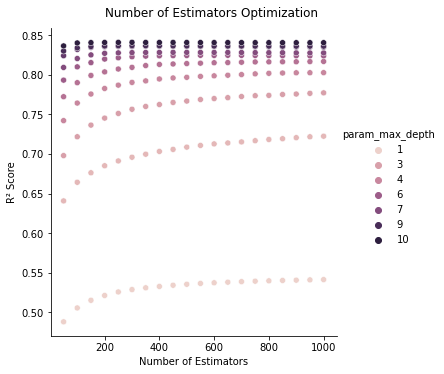

In [34]:
g = sns.relplot(data=cv_results_df,x="param_n_estimators",y="mean_test_score", hue="param_max_depth", kind="scatter")
g.fig.suptitle("Number of Estimators Optimization", y=1.03)
g.set(xlabel="Number of Estimators", ylabel="R\u00b2 Score")

In [40]:
gbm=xgb.XGBRegressor()
gbm_param_grid = {
    'colsample_bytree': np.arange(0.1,1.1,0.1),
    'subsample': np.arange(0.1,1.1, 0.1),
    'learning_rate':[0.5],
    'n_estimators': [300],
    'max_depth': [10]
}
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="r2", cv=3,refit=True,return_train_score=True, verbose=4)
grid_mse.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_mse.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.1;, score=(train=0.415, test=0.125) total time=   5.5s
[CV 2/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.1;, score=(train=0.415, test=0.147) total time=   5.3s
[CV 3/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.1;, score=(train=0.424, test=0.174) total time=   5.3s
[CV 1/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.2;, score=(train=0.601, test=0.315) total time=   7.9s
[CV 2/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.2;, score=(train=0.604, test=0.334) total time=   8.3s
[CV 3/3] END colsample_bytree=0.1, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.2;, score=(train=0.609, test=0.321) total time=   8.4s
[CV 1/3] END colsam

[CV 2/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.8;, score=(train=0.960, test=0.666) total time=  21.0s
[CV 3/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.8;, score=(train=0.959, test=0.669) total time=  21.1s
[CV 1/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.9;, score=(train=0.961, test=0.677) total time=  21.2s
[CV 2/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.9;, score=(train=0.960, test=0.678) total time=  22.0s
[CV 3/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.9;, score=(train=0.960, test=0.677) total time=  21.9s
[CV 1/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=1.0;, score=(train=0.964, test=0.683) total time=  21.5s
[CV 2/3] END colsample_bytree=0.2, learning_rate=0.5, max_depth=10, n_estimators=3

[CV 1/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.5;, score=(train=0.985, test=0.748) total time=  23.4s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.5;, score=(train=0.985, test=0.752) total time=  23.7s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.5;, score=(train=0.985, test=0.746) total time=  23.6s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.6;, score=(train=0.988, test=0.773) total time=  25.5s
[CV 2/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.6;, score=(train=0.988, test=0.771) total time=  25.5s
[CV 3/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.6;, score=(train=0.988, test=0.771) total time=  25.3s
[CV 1/3] END colsample_bytree=0.4, learning_rate=0.5, max_depth=10, n_estimators=3

[CV 3/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.2;, score=(train=0.870, test=0.348) total time=  15.8s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.30000000000000004;, score=(train=0.964, test=0.640) total time=  19.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.30000000000000004;, score=(train=0.964, test=0.635) total time=  21.2s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.30000000000000004;, score=(train=0.964, test=0.648) total time=  21.2s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.4;, score=(train=0.983, test=0.736) total time=  24.1s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.4;, score=(train=0.983, test=0.721) total time=  23.2s
[CV 3/3] END colsample_bytree=0.6,

[CV 2/3] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.9;, score=(train=0.994, test=0.824) total time=  35.8s
[CV 3/3] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.9;, score=(train=0.994, test=0.822) total time=  36.1s
[CV 1/3] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=1.0;, score=(train=0.993, test=0.823) total time=  37.1s
[CV 2/3] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=1.0;, score=(train=0.993, test=0.828) total time=  35.5s
[CV 3/3] END colsample_bytree=0.7000000000000001, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=1.0;, score=(train=0.993, test=0.829) total time=  36.4s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.1;, score=(train=-7.751, test=-17.034) total time=  13.9s
[CV 

[CV 1/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.7000000000000001;, score=(train=0.995, test=0.811) total time=  29.1s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.7000000000000001;, score=(train=0.995, test=0.813) total time=  28.9s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.7000000000000001;, score=(train=0.995, test=0.814) total time=  28.9s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.8;, score=(train=0.995, test=0.817) total time=  30.7s
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.8;, score=(train=0.995, test=0.822) total time=  30.7s
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.5, max_depth=10, n_estimators=300, subsample=0.8;, score=(train=0.995, test=0.817) total time=  31.0s
[CV 1/3] END colsample_bytree=0.9, le

In [41]:
cv_results_df = pd.DataFrame(grid_mse.cv_results_)
cv_results_df.to_excel("Xgboost_hyperparameter_tuning_gridsearch_subsample_colsamples.xlsx",index=False)
print(cv_results_df.head(10))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.389972      0.072394         0.075664        0.009899   
1       8.213380      0.232716         0.094253        0.000182   
2       9.865469      0.098113         0.083709        0.007363   
3      11.404472      0.180584         0.093319        0.006203   
4      12.468358      0.093566         0.092621        0.002122   
5      13.212186      0.077107         0.094123        0.000001   
6      13.579129      0.068415         0.088916        0.007360   
7      13.960907      0.063701         0.083579        0.007458   
8      14.508585      0.163214         0.097104        0.004214   
9      13.489579      0.392466         0.110746        0.010992   

  param_colsample_bytree param_learning_rate param_max_depth  \
0                    0.1                 0.5              10   
1                    0.1                 0.5              10   
2                    0.1                 0.5              10   
3     

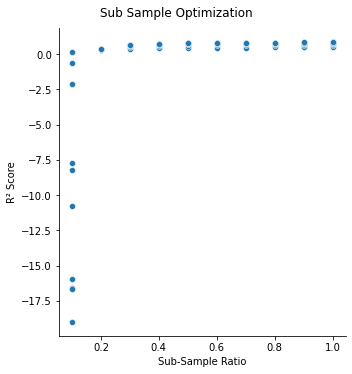

In [43]:
g = sns.relplot(data=cv_results_df,x="param_subsample",y="mean_test_score", kind="scatter")
g.fig.suptitle("Sub Sample Optimization", y=1.03)
g.set(xlabel="Sub-Sample Ratio", ylabel="R\u00b2 Score")

In [3]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.5, max_depth= 10, n_estimators= 300, subsample= 1.0)
xg_reg.fit(X_train_scaled, y_train)
predicted_test = xg_reg.predict(X_test_scaled)
test_error = mean_squared_error(y_test,predicted_test,squared = False)
print("Test RMSE error is: ",test_error, " dB.")
r_squared_error_test = xg_reg.score(X_test_scaled, y_test)
print("R-Squared error on test dataset is:",r_squared_error_test)
test_MAPE = mean_absolute_percentage_error(y_test, predicted_test)
print("Test MAPE error is:",test_MAPE)
test_MAE = mean_absolute_error(y_test, predicted_test)
print("Test MAE error is:",test_MAE)

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path.  List of candidates:
- C:\Users\Sajjad Hussain\anaconda3\lib\site-packages\xgboost\lib\xgboost.dll
- C:\Users\Sajjad Hussain\anaconda3\lib\site-packages\xgboost\..\..\lib\xgboost.dll
- C:\Users\Sajjad Hussain\anaconda3\lib\xgboost.dll
- C:\Users\Sajjad Hussain\anaconda3\lib\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
- C:\Users\Sajjad Hussain\anaconda3\lib\site-packages\xgboost\./windows/x64/Release/xgboost.dll
XGBoost Python package path: C:\Users\Sajjad Hussain\anaconda3\lib\site-packages\xgboost
sys.prefix: C:\Users\Sajjad Hussain\anaconda3
See: https://xgboost.readthedocs.io/en/latest/build.html for installing XGBoost.

   True_values  Predicted_values
0     98.42698         98.856308
1    107.93980        102.173538
2     99.48324        101.203506
3    135.93880        138.074005
4    100.19494         99.508049


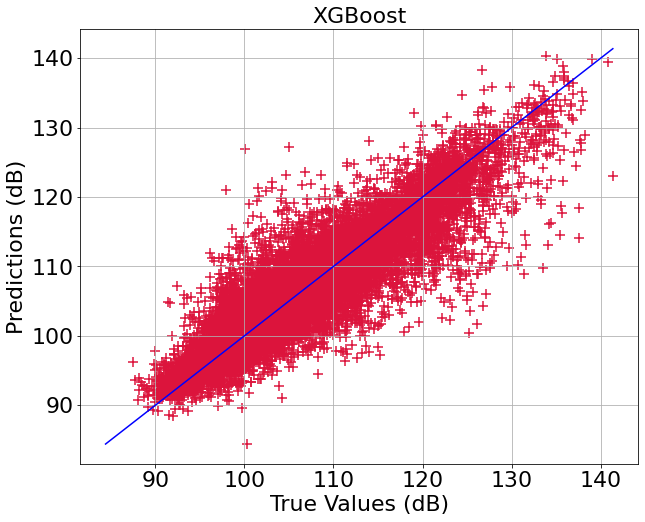

In [5]:
# Print Test Data Results for XGBoost
#df=pd.Dataframe()
df = pd.read_excel("XGB_true_vs_predictions_test_data.xlsx")
#df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.figure(figsize=(10, 8))
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',s=100)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=22)
plt.ylabel('Predictions (dB)', fontsize=22)
plt.title('XGBoost', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('xgb_test_data_results_new.eps', format='eps')

In [46]:
# Save predictions vs True values for Test Data for SVM
df.to_excel("XGB_true_vs_predictions_test_data.xlsx",index=False)

In [70]:
# Load Evaluation Data
evaluation = pd.read_excel('validation_set_04_tx45.xlsx')
evaluation_set = evaluation[['no_visible_walls','avg_distance_to_walls','min_distace_to_walls','Phi','Theta','3d_distance','walls_pen','indoor_distance','outdoor_distance','min_wall_height','max_wall_height','avg_wall_height','Transmitter_ZZ','Path_loss_average'
]]
X_eval_set2 = evaluation_set.drop(["Path_loss_average"],axis=1).values
X_eval_set = scaler.transform(X_eval_set2)
y_eval_set = evaluation_set["Path_loss_average"].values
evaluation_results = evaluation[['Receiver_XX','Receiver_YY','Transmitter_XX','Transmitter_YY','Transmitter_ZZ','Path_loss_average'
]].copy()
evaluation_results['predicted_xgb'] = 0

In [71]:
# Evaluate on Evaluation Dataset
predicted_eval_set = xg_reg.predict(X_eval_set)
evaluation_error = mean_squared_error(y_eval_set,predicted_eval_set,squared = False)
print("R^2 score: ",xg_reg.score(X_eval_set, y_eval_set), "dB.")
print("RMSE: ",evaluation_error, "dB.")
print("MAE: ",mean_absolute_error(y_eval_set, predicted_eval_set), "dB.")
print("MAPE: ",mean_absolute_percentage_error(y_eval_set, predicted_eval_set), "dB.")

R^2 score:  0.40092524521125905 dB.
RMSE:  3.949817847673909 dB.
MAE:  2.7775590439142324 dB.
MAPE:  0.026072257644788273 dB.


In [72]:
# Save Results in Excel Sheet for plot in Matlab
evaluation_results['predicted_xgb'] = predicted_eval_set
file_name = 'receivers_grid_data.txt'
completedata = np.loadtxt(file_name,delimiter=' ')
df_temp = pd.DataFrame(completedata)
cols = ['index_rx','Receiver_XX','Receiver_YY']
df_temp.columns = cols
df_temp['index_rx'] = df_temp['index_rx'].astype('int')
df_temp['Transmitter_XX'] = evaluation_results['Transmitter_XX'][0]
df_temp['Transmitter_YY'] = evaluation_results['Transmitter_YY'][0]
df_temp['Transmitter_ZZ'] = evaluation_results['Transmitter_ZZ'][0]
df = pd.merge(df_temp,evaluation_results,on=['Receiver_XX','Receiver_YY', 'Transmitter_XX','Transmitter_YY','Transmitter_ZZ'],how='left')
df.to_excel("XGB_validation_set_04_tx45_final.xlsx",index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


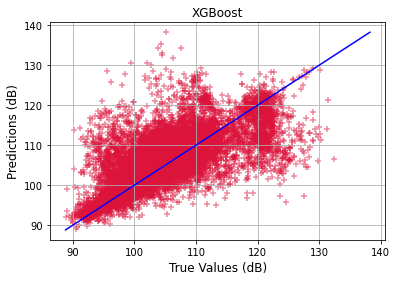

In [73]:
#Now plot the results
df4 = pd.read_excel('XGB_validation_set_02_tx25_final.xlsx')
df5 = pd.read_excel('XGB_validation_set_02_tx45_final.xlsx')
df6 = pd.read_excel('XGB_validation_set_03_tx25_final.xlsx')
df7 = pd.read_excel('XGB_validation_set_03_tx35_final.xlsx')
df8 = pd.read_excel('XGB_validation_set_03_tx45_final.xlsx')
df9 = pd.read_excel('XGB_validation_set_04_tx25_final.xlsx')
df10 = pd.read_excel('XGB_validation_set_04_tx45_final.xlsx')
df_concat = pd.concat([df4,df5,df6, df7, df8, df9, df10], ignore_index = True)
df_concat = df_concat.dropna()
true_value = df_concat["Path_loss_average"].reset_index(drop=True)
predicted_value = df_concat["predicted_xgb"].reset_index(drop=True)
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',alpha=0.5)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=12)
plt.ylabel('Predictions (dB)', fontsize=12)
plt.title('XGBoost', fontsize=12)
plt.grid()
plt.savefig('Pathloss_predicted_vs_actual_XGB_validation_data.eps', format='eps')

In [51]:
print(xg_reg.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.5, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


   true_value  predicted_value
0    98.42698        99.108276
1   107.93980       103.325371
2    99.48324        99.184113
3   135.93880       136.831085
4   100.19494        99.502853


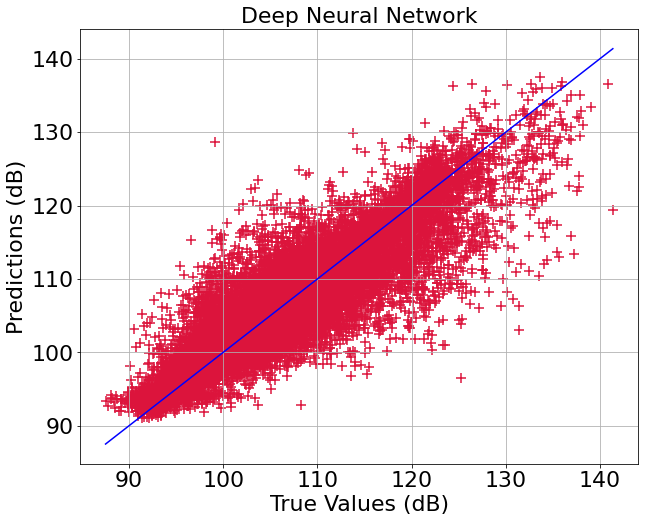

In [8]:
df = pd.read_excel("deep_neural_network_test_data_results.xlsx")
#df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["true_value"].reset_index(drop=True)
predicted_value = df["predicted_value"].reset_index(drop=True)
plt.figure(figsize=(10, 8))
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',s=100)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=22)
plt.ylabel('Predictions (dB)', fontsize=22)
plt.title('Deep Neural Network', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('dnn_test_data_results_new.eps', format='eps')

   True_values  Predicted_values
0     98.42698         99.203350
1    107.93980        104.905724
2     99.48324         99.068033
3    135.93880        136.564032
4    100.19494         99.830348


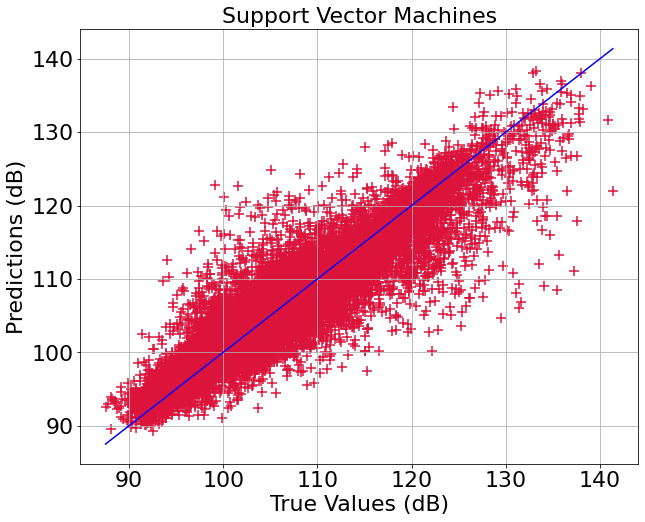

In [9]:
df = pd.read_excel("svr_test_data_results_dec23.xlsx")
#df = pd.DataFrame({ 'True_values': y_test, 'Predicted_values':predicted_test })
print(df.head())
true_value = df["True_values"].reset_index(drop=True)
predicted_value = df["Predicted_values"].reset_index(drop=True)
plt.figure(figsize=(10, 8))
plt.scatter(true_value, predicted_value, c='crimson',marker = '+',s=100)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (dB)', fontsize=22)
plt.ylabel('Predictions (dB)', fontsize=22)
plt.title('Support Vector Machines', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('svr_test_data_results_new.eps', format='eps')

# 6. Feature Importance

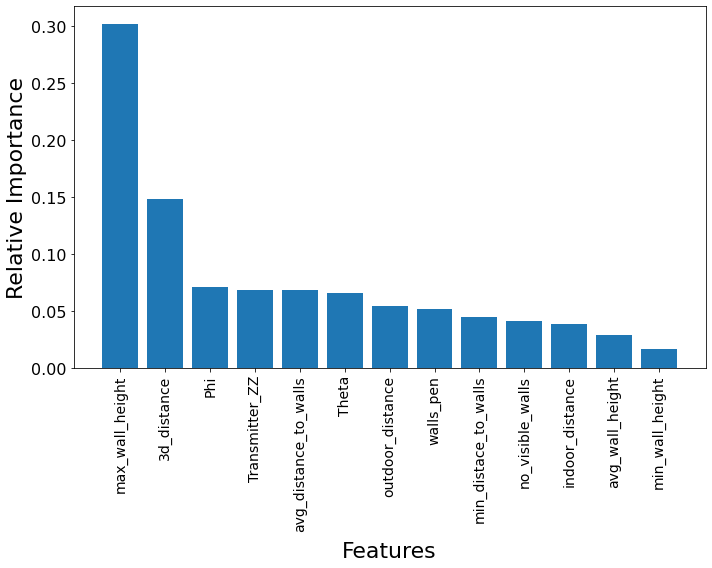

In [23]:
feature_importance_df = pd.read_excel('rf_feature_importance_comparison.xlsx')
plt.figure(figsize=(10, 8),layout='tight')
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features', fontsize=22, labelpad=10)
plt.ylabel('Relative Importance', fontsize=22)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.savefig('rf_feature_importances.eps', format='eps')

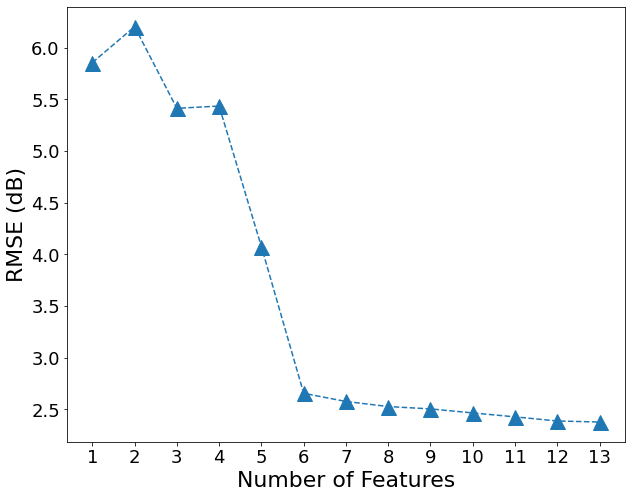

In [22]:
features = [1,2,3,4,5,6,7,8,9,10,11,12,13]
rmse_features = [5.855,6.203,5.413,5.435,4.074,2.655,2.576,2.527,2.504,2.465,2.427,2.387,2.377]
df = pd.DataFrame(data={'features':features,'rmse_features':rmse_features})
plt.figure(figsize=(10, 8))
plt.plot(df['features'],df['rmse_features'],'^--',markersize=15)
plt.xlabel('Number of Features', fontsize=22)
plt.ylabel('RMSE (dB)',fontsize=22)
plt.xticks(ticks=np.arange(1,14),fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('rmse_with_increasing_features.eps', format='eps')

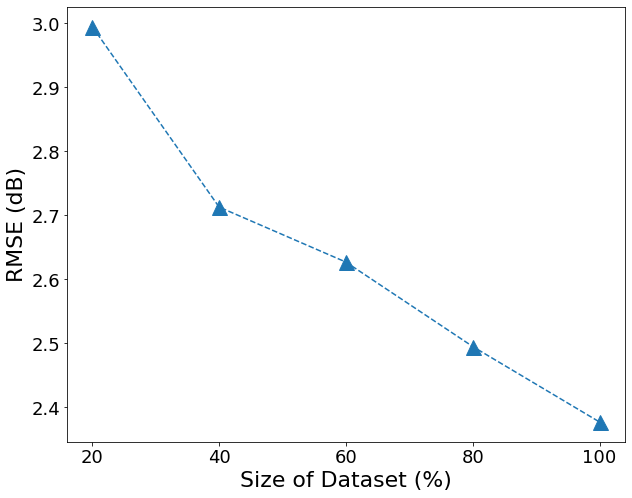

In [25]:
data_percent = [20,40,60,80,100]
rmse_data = [2.995,2.713,2.627,2.495,2.377]
df = pd.DataFrame(data={'data_percent':data_percent,'rmse_data':rmse_data})
plt.figure(figsize=(10, 8))
plt.plot(df['data_percent'],df['rmse_data'],'^--', markersize=15)
plt.xlabel('Size of Dataset (%)', fontsize=22)
plt.ylabel('RMSE (dB)',fontsize=22)
plt.xticks(ticks=[20,40,60,80,100], fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('rmse_with_increasing_dataset_size.eps', format='eps')

In [26]:
print(feature_importance_df.head(13))

                  Feature  Importance
0         max_wall_height    0.301947
1             3d_distance    0.148273
2                     Phi    0.070881
3          Transmitter_ZZ    0.068298
4   avg_distance_to_walls    0.068188
5                   Theta    0.065967
6        outdoor_distance    0.054510
7               walls_pen    0.051864
8    min_distace_to_walls    0.044687
9        no_visible_walls    0.040911
10        indoor_distance    0.038849
11        avg_wall_height    0.028764
12        min_wall_height    0.016862


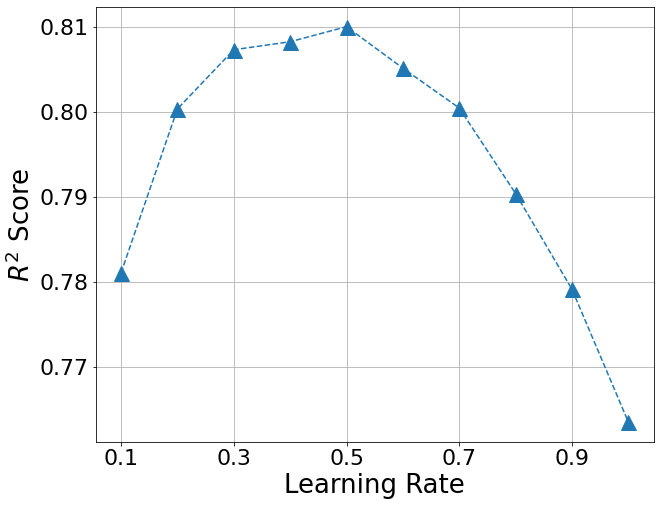

In [6]:
df = pd.read_excel("Xgboost_initial_hyperparameter_tuning_gridsearch_learningrate.xlsx")
plt.figure(figsize=(10, 8))
plt.plot(df['param_learning_rate'],df['mean_test_score'],'^--', markersize=15)
plt.xlabel('Learning Rate', fontsize=26)
plt.ylabel('$R^2$ Score',fontsize=26)
plt.xticks([0.1, 0.3,0.5,0.7,0.9],fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
plt.savefig('XGBoost_learn_rate.eps', format='eps')

In [7]:
df_act_func = pd.read_excel("activation_function_validation_loss_comparison_100_epochs.xlsx")
print(df_act_func.head())

   epochs       relu      tanh     linear
0       1   9.330145  9.268384  14.934961
1       2  10.272205  8.169069  16.738169
2       3   9.764208  7.662406  16.680244
3       4  10.719942  7.776549  13.798379
4       5   8.829269  7.365888  13.236688


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


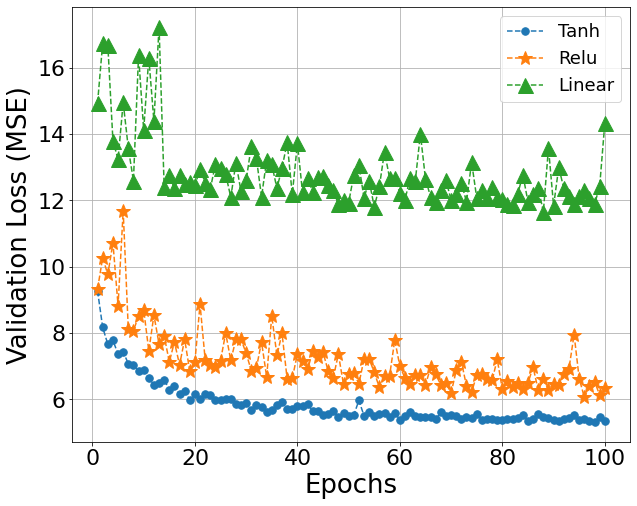

In [15]:
#df_act_func = pd.read_excel("activation_function_validation_loss_comparison_100_epochs.xlsx")
plt.figure(figsize=(10, 8))
plt.plot(df_act_func['epochs'],df_act_func['tanh'],'.--', markersize=15)
plt.plot(df_act_func['epochs'],df_act_func['relu'],'*--', markersize=15)
plt.plot(df_act_func['epochs'],df_act_func['linear'],'^--', markersize=15)
plt.xlabel('Epochs', fontsize=26)
plt.ylabel('Validation Loss (MSE)',fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(['Tanh','Relu','Linear'],fontsize=18)
plt.grid()
plt.savefig('dnn_activation_functions.eps', format='eps')

In [4]:
df = pd.read_excel("learn_rates_validation_loss_comparison.xlsx")
print(df.head())

   Epochs  Adam Learning rate = 0.0001  Adam Learning rate = 0.001  \
0       1                    19.021973                    9.218163   
1       2                    18.309429                    7.972184   
2       3                    13.227092                    8.617585   
3       4                    12.849397                    7.553584   
4       5                     9.364385                    7.352717   

   SGD Learning rate = 0.0001  SGD Learning rate = 0.001  
0                   11.118759                  10.166463  
1                   10.667624                   8.528205  
2                   10.236435                   8.053638  
3                    9.902240                   8.027175  
4                    9.630733                   7.825161  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


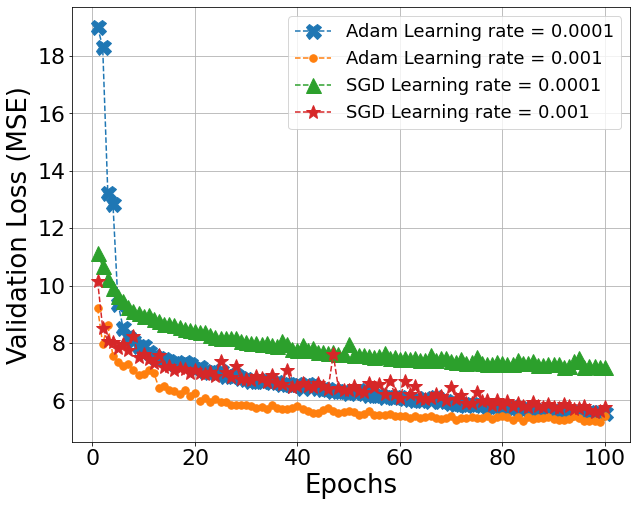

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(df['Epochs'],df['Adam Learning rate = 0.0001'],'X--', markersize=15)
plt.plot(df['Epochs'],df['Adam Learning rate = 0.001'],'.--', markersize=15)
plt.plot(df['Epochs'],df['SGD Learning rate = 0.0001'],'^--', markersize=15)
plt.plot(df['Epochs'],df['SGD Learning rate = 0.001'],'*--', markersize=15)
plt.xlabel('Epochs', fontsize=26)
plt.ylabel('Validation Loss (MSE)',fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(['Adam Learning rate = 0.0001','Adam Learning rate = 0.001','SGD Learning rate = 0.0001','SGD Learning rate = 0.001'],fontsize=18)
plt.grid()
plt.savefig('dnn_learn_rates.eps', format='eps')